### **Student Information**
Name: Shaquille Hunte 

Student ID: 114065427

GitHub ID: Hakeem-bit

Kaggle name: Hakeem Hunte

Kaggle private scoreboard snapshot: 

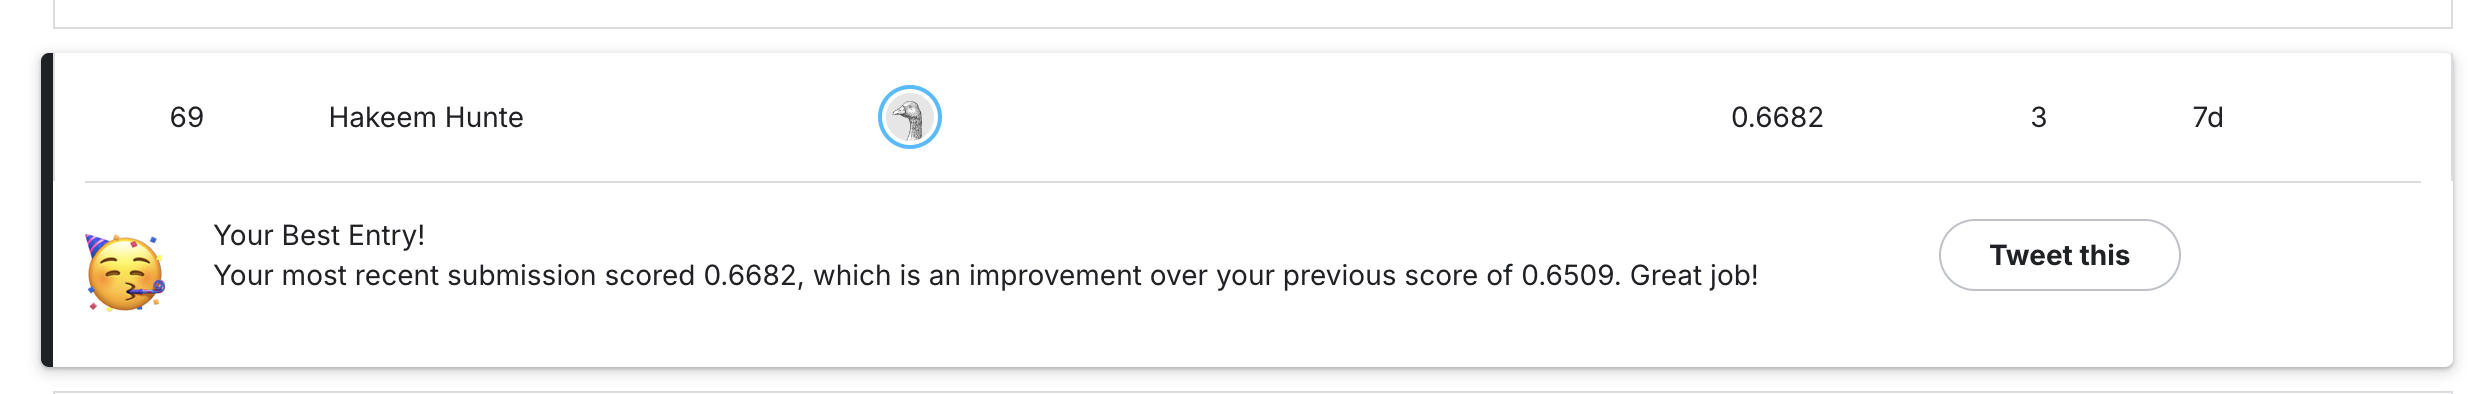


# 1. Preprocessing Steps 
___

### Load Datasets

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import re   

# Set dispaly options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
print("Libraries imported successfully")

Libraries imported successfully


In [3]:
#Load all competation files 

#load JSON files
with open('./DM Lab 2 Private Competition/dm-lab-2-private-competition/final_posts.json', 'r') as f:
    post_data = json.load(f)

emotions_df = pd.read_csv('./DM Lab 2 Private Competition/dm-lab-2-private-competition/emotion.csv')

split_df = pd.read_csv('./DM Lab 2 Private Competition/dm-lab-2-private-competition/data_identification.csv')

sample_sub = pd.read_csv('./DM Lab 2 Private Competition/dm-lab-2-private-competition/samplesubmission.csv')

print("Competition files loaded successfully")
print(f" - Post(JSON) data: {len(post_data)} records")
print(f" - Emotions labels: {len(emotions_df)} rows")
print(f" - Split data: {len(split_df)} rows")
print(f" - Sample submission: {len(sample_sub)} rows")

Competition files loaded successfully
 - Post(JSON) data: 64171 records
 - Emotions labels: 47890 rows
 - Split data: 64171 rows
 - Sample submission: 16281 rows


In [4]:
# Parse JSON to extract post_id and text

posts_list = []
for item in post_data:
    post_id = item['root']['_source']['post']['post_id']
    text = item['root']['_source']['post']['text']
    hashtags = item['root']['_source']['post']['hashtags']
    posts_list.append({
        'id': post_id,
        'text': text,
        'hashtags': hashtags
    })

# Create posts DataFrame
posts_df = pd.DataFrame(posts_list)

print("Text extracted from JSON")
print(f"  Total posts: {len(posts_df)}")
print(f"\nFirst few posts:")
display(posts_df.head())

Text extracted from JSON
  Total posts: 64171

First few posts:


,id,text,hashtags
0,0x61fc95,"We got the ranch, loaded our guns and sat up t...",[]
1,0x35663e,I bet there is an army of married couples who ...,[]
2,0xc78afe,This could only end badly.,[]
3,0x90089c,My sister squeezed a lime in her milk when she...,[]
4,0xaba820,and that got my head bobbing a little bit.,[]


In [5]:
# Merge datasets to create a master DataFrame
master_df = posts_df.merge(emotions_df, on='id', how='left')
master_df = master_df.merge(split_df, on='id', how='left')

# Separate train and test sets
train_df = master_df[master_df['split'] == 'train'].reset_index(drop=True).copy()
test_df = master_df[master_df['split'] == 'test'].reset_index(drop=True).copy()

In [6]:
# Display dataset information 

print("Master DataFrame created")
print(f" - Total records: {len(master_df)}")
print(f"Training set: {len(train_df)} ({len(train_df)/len(master_df)*100:.1f}%)")
print(f"Test set: {len(test_df)} ({len(test_df)/len(master_df)*100:.1f}%)")

print(f"\nFirst few rows of training set:")
display(train_df.head())

print(f"\nFirst few rows of test set:")
display(test_df.head())

print("Dataset ready for preprocessing and modeling")

Master DataFrame created
 - Total records: 64171
Training set: 47890 (74.6%)
Test set: 16281 (25.4%)

First few rows of training set:


,id,text,hashtags,emotion,split
0,0x35663e,I bet there is an army of married couples who ...,[],joy,train
1,0xc78afe,This could only end badly.,[],fear,train
2,0x90089c,My sister squeezed a lime in her milk when she...,[],joy,train
3,0x2ffb63,Thank you so much❤️,[],joy,train
4,0x989146,Stinks because ive been in this program for a ...,[],joy,train



First few rows of test set:


,id,text,hashtags,emotion,split
0,0x61fc95,"We got the ranch, loaded our guns and sat up t...",[],NaN,test
1,0xaba820,and that got my head bobbing a little bit.,[],NaN,test
2,0x66e44d,Same. Glad it's not just out store.,[],NaN,test
3,0xc03cf5,Like always i will wait and see thanks for the...,[],NaN,test
4,0x02f65a,"There's a bit of room between ""not loving sub-...",[],NaN,test


Dataset ready for preprocessing and modeling


In [7]:
#explore the train dataset emotions distribution

emotion_counts = train_df['emotion'].value_counts()
print(emotion_counts)
print(f"\nTotal emotions: {train_df['emotion'].nunique()}")
print(f"Emotions: {train_df['emotion'].unique().tolist()}")

emotion
joy         23797
anger       10694
surprise     6281
sadness      3926
fear         2009
disgust      1183
Name: count, dtype: int64

Total emotions: 6
Emotions: ['joy', 'fear', 'anger', 'surprise', 'sadness', 'disgust']


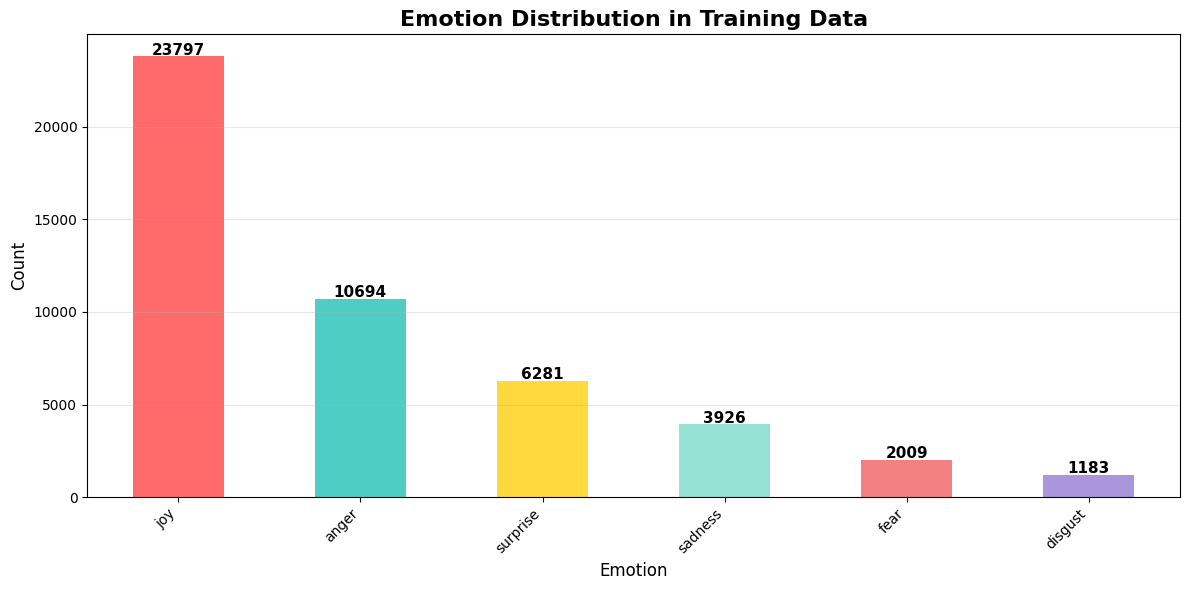

In [8]:
#Plot emotion distribution

plt.figure(figsize=(12, 6))
colors = ['#FF6B6B', '#4ECDC4', '#FFD93D', '#95E1D3', '#F38181', '#AA96DA']
emotion_counts.plot(kind='bar', color=colors[:len(emotion_counts)])
plt.title('Emotion Distribution in Training Data', fontsize=16, fontweight='bold')
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add counts on bars
for i, v in enumerate(emotion_counts):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()


In [9]:
#Sample preprocessing function

print("SAMPLE TEXTS BY EMOTION\n")
for emotion in train_df['emotion'].unique():
    print(f"\n--- {emotion.upper()} ---")
    samples = train_df[train_df['emotion'] == emotion]['text'].head(3)
    for i, text in enumerate(samples, 1):
        print(f"{i}. {text}")

print("\n Exploratory analysis complete")


SAMPLE TEXTS BY EMOTION


--- JOY ---
1. I bet there is an army of married couples who did the same exact thing.
2. My sister squeezed a lime in her milk when she was 12. Same thing happened, but we told her it would happen AFTER she did it ..
3. Thank you so much❤️

--- FEAR ---
1. This could only end badly.
2. This is where the story gets CREEPY.
3. The 5 days got an audible "[NAME]" out of me. That's terrifying. 

--- ANGER ---
1. The overall response is try and empower women, abolish prostitution and stop giving lazy men money because they want to live out their idiotic fantasy lives. 
2. Your market sucks
3. Rap that will Cut other raper's throat. Who said that? @Paedeezy #badd #wicked. #bright city lights

--- SURPRISE ---
1. What were they mumbling at the end before the commercial break? That was weird.
2. Why did it fracture from just a kick?
3. maybe you learned it from the yellow vest movement in France?

--- SADNESS ---
1. Poor critter D:
2. That entire family is so embarras

### Text Cleaning


In [10]:
def preprocess_text(text):
    """ Cleaning text by removing URLs, mentions, hashtags, special characters, and converting to lowercase. """
    
    if not isinstance(text, str):
        return ""
    
    text = str(text)
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (optional: keep the hashtag text)
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s!?.]', '', text)

    #handle common contractions 
    contractions = {
        "can't": "cannot",
        "won't": "will not",
        "n't": " not",
        "'re": " are",
        "'s": " is",
        "'d": " would",
        "'ll": " will",
        "'t": " not",
        "'ve": " have",
        "'m": " am"
    }
    for contraction, expension in contractions.items():
        text = text.replace(contraction, expension)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [11]:
#Apply preprocessing to cleaning to training and test sets
print("Applying text preprocessing...")
train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)
test_df['cleaned_text'] = test_df['text'].apply(preprocess_text)
print(" Text preprocessing complete")

#Display sample cleaned texts
print("SAMPLE CLEANED TEXTS BY EMOTION\n")
for i in range(3):
    emotion = train_df['emotion'].unique()[i]
    print(f"\n--- {emotion.upper()} ---")
    samples = train_df[train_df['emotion'] == emotion]['cleaned_text'].head(3)
    for j, text in enumerate(samples, 1):
        print(f"{j}. {text}")

Applying text preprocessing...
 Text preprocessing complete
SAMPLE CLEANED TEXTS BY EMOTION


--- JOY ---
1. i bet there is an army of married couples who did the same exact thing.
2. my sister squeezed a lime in her milk when she was . same thing happened but we told her it would happen after she did it ..
3. thank you so much

--- FEAR ---
1. this could only end badly.
2. this is where the story gets creepy.
3. the days got an audible name out of me. thats terrifying.

--- ANGER ---
1. the overall response is try and empower women abolish prostitution and stop giving lazy men money because they want to live out their idiotic fantasy lives.
2. your market sucks
3. rap that will cut other rapers throat. who said that? . city lights


In [12]:
#check for any empty cleaned texts
empty_train = train_df[train_df['cleaned_text'] == '']
empty_test = test_df[test_df['cleaned_text'] == '']
print(f"\nEmpty cleaned texts in training set: {len(empty_train)}")
print(f"Empty cleaned texts in test set: {len(empty_test)}")
if len(empty_train) > 0:
    print("\nSample empty cleaned texts in training set:")
    display(empty_train.head())
if len(empty_test) > 0:
    print("\nSample empty cleaned texts in test set:")
    display(empty_test.head())


Empty cleaned texts in training set: 3
Empty cleaned texts in test set: 1

Sample empty cleaned texts in training set:


,id,text,hashtags,emotion,split,cleaned_text
29883,0x324949,(:),[],joy,train,
41274,0xbfb5f2,:^),[],joy,train,
46395,0x9a6b44,:((,[],joy,train,



Sample empty cleaned texts in test set:


,id,text,hashtags,emotion,split,cleaned_text
1802,0x06fb1f,😘 ☂ ☂️☂️,[],NaN,test,


### Text Analysis

In [13]:
# Analyzing the text length distribution in the training set

# Calculate text length statistics for both original and cleaned text
train_df['text_length'] = train_df['text'].apply(len)
train_df['cleaned_length'] = train_df['cleaned_text'].apply(len)
train_df['word_count'] = train_df['cleaned_text'].apply(lambda x: len(x.split()) if x else 0)

test_df['text_length'] = test_df['text'].apply(len)
test_df['cleaned_length'] = test_df['cleaned_text'].apply(len)
test_df['word_count'] = test_df['cleaned_text'].apply(lambda x: len(x.split()) if x else 0)

print("\n--- Length Statistics by Emotion (Training Set) ---")
print(train_df.groupby('emotion')[['text_length', 'cleaned_length', 'word_count']].describe())


--- Length Statistics by Emotion (Training Set) ---
         text_length                                                       \
               count       mean        std  min   25%   50%    75%    max   
emotion                                                                     
anger        10694.0  85.867402  49.328198  4.0  50.0  82.0  117.0  497.0   
disgust       1183.0  79.010144  38.707654  6.0  49.0  77.0  109.0  347.0   
fear          2009.0  80.705824  46.390830  7.0  45.0  76.0  110.0  390.0   
joy          23797.0  70.658444  38.319100  2.0  39.0  67.0   99.0  703.0   
sadness       3926.0  75.493887  39.958894  6.0  44.0  71.0  103.0  425.0   
surprise      6281.0  71.890145  35.597145  4.0  43.0  69.0   98.0  313.0   

         cleaned_length                                                       \
                  count       mean        std  min   25%   50%    75%    max   
emotion                                                                        
anger        

#### 1. Challenge: " Not Reviewing statisitical data

When i first the code, i was such in the  rush to get it completed that i didn't take time to review the statisticial outputs. 
Based on the outputs, i would make some adjustments to the preprocessing function to better handle outliers and improve text cleaning.
Such a normamization steps could include:
- Limiting maximum text length by truncating excessively long posts.
- Removing or flagging posts with very low word counts as they may not provide sufficient context for emotion detection.


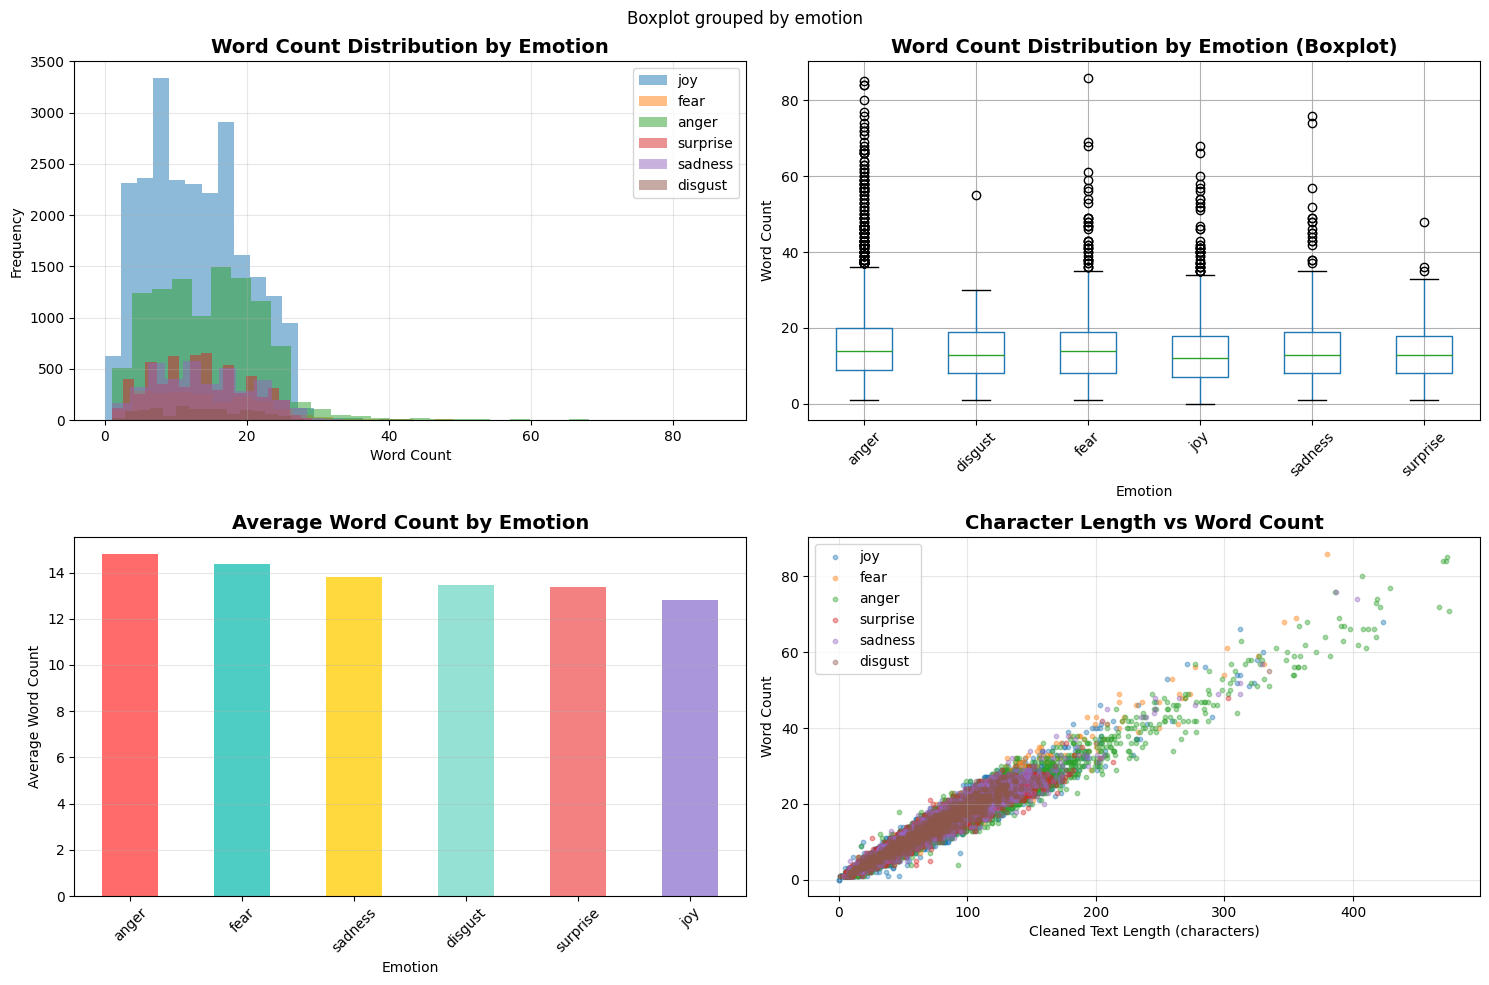

In [14]:
# Visualize text length distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Word count distribution by emotion
for emotion in train_df['emotion'].unique():
    emotion_data = train_df[train_df['emotion'] == emotion]['word_count']
    axes[0, 0].hist(emotion_data, alpha=0.5, label=emotion, bins=30)
axes[0, 0].set_title('Word Count Distribution by Emotion', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Word Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Box plot of word count by emotion
train_df.boxplot(column='word_count', by='emotion', ax=axes[0, 1])
axes[0, 1].set_title('Word Count Distribution by Emotion (Boxplot)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Emotion')
axes[0, 1].set_ylabel('Word Count')
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

# 3. Average word count by emotion
emotion_word_avg = train_df.groupby('emotion')['word_count'].mean().sort_values(ascending=False)
emotion_word_avg.plot(kind='bar', ax=axes[1, 0], color=colors[:len(emotion_word_avg)])
axes[1, 0].set_title('Average Word Count by Emotion', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Emotion')
axes[1, 0].set_ylabel('Average Word Count')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Character length vs word count scatter
for emotion in train_df['emotion'].unique():
    emotion_data = train_df[train_df['emotion'] == emotion]
    axes[1, 1].scatter(emotion_data['cleaned_length'], emotion_data['word_count'], 
                       alpha=0.4, label=emotion, s=10)
axes[1, 1].set_title('Character Length vs Word Count', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Cleaned Text Length (characters)')
axes[1, 1].set_ylabel('Word Count')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
#identfying short texts
short_texts_train = train_df[train_df['word_count'] < 3]
short_texts_test = test_df[test_df['word_count'] < 3]

print(f"Training set: {len(short_texts_train)} texts with < 3 words ({len(short_texts_train)/len(train_df)*100:.2f}%)")
print(f"Test set: {len(short_texts_test)} texts with < 3 words ({len(short_texts_test)/len(test_df)*100:.2f}%)")

if len(short_texts_train) > 0:
    print("\nShort text distribution by emotion:")
    print(short_texts_train['emotion'].value_counts())
    print("\nExamples of short texts:")
    for i, row in short_texts_train.head(10).iterrows():
        print(f"- ({row['emotion']}) {row['cleaned_text']}")

Training set: 1006 texts with < 3 words (2.10%)
Test set: 274 texts with < 3 words (1.68%)

Short text distribution by emotion:
emotion
joy         626
anger       164
surprise    115
sadness      47
fear         29
disgust      25
Name: count, dtype: int64

Examples of short texts:
- (joy) thanks
- (surprise) omg... dad!
- (joy) pretty please!?
- (joy) groom gloom.
- (joy) thanks bud!
- (joy) judah!!
- (anger) f breezy
- (joy) ha congrats!
- (joy) microsoft.netframework..fullplusbygora
- (joy) good job...


In [16]:
# Check for duplicate texts
duplicate_train = train_df[train_df.duplicated(subset='cleaned_text', keep=False)]
duplicate_test = test_df[test_df.duplicated(subset='cleaned_text', keep=False)]

print(f"Training set duplicates: {len(duplicate_train)} ({len(duplicate_train)/len(train_df)*100:.2f}%)")
print(f"Test set duplicates: {len(duplicate_test)} ({len(duplicate_test)/len(test_df)*100:.2f}%)")

if len(duplicate_train) > 0:
    print("\nSample duplicate texts:")
    dup_sample = duplicate_train.groupby('cleaned_text').filter(lambda x: len(x) > 1).head(10)
    for text in dup_sample['cleaned_text'].unique()[:3]:
        dup_rows = train_df[train_df['cleaned_text'] == text]
        print(f"\nText: '{text}'")
        print(f"  Emotions: {dup_rows['emotion'].tolist()}")

Training set duplicates: 1278 (2.67%)
Test set duplicates: 238 (1.46%)

Sample duplicate texts:

Text: 'thank you so much'
  Emotions: ['joy', 'joy', 'joy']

Text: 'thanks'
  Emotions: ['joy', 'joy', 'joy', 'joy']

Text: 'swear to god dont get a smart meter from your power company months of daft bills visits from british gas'
  Emotions: ['anger', 'anger']


In [17]:
from collections import Counter

def get_top_words(df, emotion, n=10):
    """Get top N most common words for a specific emotion"""
    emotion_texts = df[df['emotion'] == emotion]['cleaned_text']
    all_words = ' '.join(emotion_texts).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

# Display top words for each emotion
for emotion in train_df['emotion'].unique():
    top_words = get_top_words(train_df, emotion, n=15)
    print(f"\n--- {emotion.upper()} (Top 15 words) ---")
    for word, count in top_words:
        print(f"  {word}: {count}")

print("\n Text analysis complete!")


--- JOY (Top 15 words) ---
  the: 9892
  i: 9615
  to: 6923
  a: 6859
  and: 5366
  you: 4944
  is: 4252
  of: 3942
  for: 3653
  that: 3574
  it: 3455
  this: 3254
  in: 3190
  name: 3169
  my: 2664

--- FEAR (Top 15 words) ---
  i: 1074
  the: 995
  my: 762
  to: 739
  and: 675
  a: 632
  of: 469
  in: 372
  is: 364
  was: 349
  it: 330
  that: 302
  im: 240
  this: 238
  for: 225

--- ANGER (Top 15 words) ---
  the: 4994
  to: 3588
  i: 3497
  a: 3418
  and: 2822
  you: 2380
  is: 2302
  of: 2001
  that: 1782
  in: 1627
  it: 1605
  not: 1409
  this: 1331
  for: 1259
  my: 1154

--- SURPRISE (Top 15 words) ---
  the: 2839
  i: 2519
  to: 1866
  a: 1790
  you: 1446
  is: 1318
  that: 1245
  and: 1098
  it: 1087
  of: 1046
  name: 947
  in: 914
  this: 903
  was: 751
  what: 731

--- SADNESS (Top 15 words) ---
  i: 1771
  the: 1689
  to: 1239
  a: 1184
  and: 917
  that: 725
  is: 721
  of: 697
  it: 662
  in: 601
  my: 583
  you: 581
  for: 546
  this: 526
  name: 482

--- DISGUST (

### Text Cleaning cont. 


In [18]:
from collections import Counter

#manuel stopwords list --- uanble to load nltk stopwords
stopwords = set(["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
                 "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
                    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being",
                    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as",
                    "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after",
                    "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here",
                    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s",
                    "t", "can", "will", "just", "don", "should", "now"])

print(f"Total stopwords: {len(stopwords)}")
print(f"Sample stopwords: {list(stopwords)[:10]}")

Total stopwords: 127
Sample stopwords: ['but', 'it', 'as', 'off', 'yourself', 'their', 'just', 'if', 'for', 'being']


In [19]:

# Define tokenize_text function
def tokenize_text(text):
    """Tokenize text into a list of words"""
    if not text:
        return []
    return text.split()

# Define remove_stopwords to work with lists
def remove_stopwords_list(tokens):
    """Remove stopwords from a list of tokens"""
    return [word for word in tokens if word.lower() not in stopwords]

# Apply tokenization
print("Tokenizing training data...")
train_df['tokens'] = train_df['cleaned_text'].apply(tokenize_text)
print(" Training data tokenized")

print("Tokenizing test data...")
test_df['tokens'] = test_df['cleaned_text'].apply(tokenize_text)
print(" Test data tokenized")


Tokenizing training data...
 Training data tokenized
Tokenizing test data...
 Test data tokenized


In [20]:
# Remove stop words
print("\nRemoving stop words...")
train_df['tokens_no_stop'] = train_df['tokens'].apply(remove_stopwords_list)
test_df['tokens_no_stop'] = test_df['tokens'].apply(remove_stopwords_list)
print("✓ Stop words removed\n")

# Show examples
print("EXAMPLES")
for i in range(5):
    print(f"\n--- Example {i+1} ---")
    print(f"Original: {train_df.iloc[i]['cleaned_text']}")
    print(f"Tokens (with stop): {train_df.iloc[i]['tokens']}")
    print(f"Tokens (no stop):   {train_df.iloc[i]['tokens_no_stop']}")

# Statistics
print("STATISTICS")
train_df['token_count'] = train_df['tokens'].apply(len)
train_df['token_count_no_stop'] = train_df['tokens_no_stop'].apply(len)
test_df['token_count'] = test_df['tokens'].apply(len)
test_df['token_count_no_stop'] = test_df['tokens_no_stop'].apply(len)

print(f"Average tokens (with stop): {train_df['token_count'].mean():.2f}")
print(f"Average tokens (no stop): {train_df['token_count_no_stop'].mean():.2f}")
print(f"Reduction: {(1 - train_df['token_count_no_stop'].mean()/train_df['token_count'].mean())*100:.1f}%")



Removing stop words...
✓ Stop words removed

EXAMPLES

--- Example 1 ---
Original: i bet there is an army of married couples who did the same exact thing.
Tokens (with stop): ['i', 'bet', 'there', 'is', 'an', 'army', 'of', 'married', 'couples', 'who', 'did', 'the', 'same', 'exact', 'thing.']
Tokens (no stop):   ['bet', 'army', 'married', 'couples', 'exact', 'thing.']

--- Example 2 ---
Original: this could only end badly.
Tokens (with stop): ['this', 'could', 'only', 'end', 'badly.']
Tokens (no stop):   ['could', 'end', 'badly.']

--- Example 3 ---
Original: my sister squeezed a lime in her milk when she was . same thing happened but we told her it would happen after she did it ..
Tokens (with stop): ['my', 'sister', 'squeezed', 'a', 'lime', 'in', 'her', 'milk', 'when', 'she', 'was', '.', 'same', 'thing', 'happened', 'but', 'we', 'told', 'her', 'it', 'would', 'happen', 'after', 'she', 'did', 'it', '..']
Tokens (no stop):   ['sister', 'squeezed', 'lime', 'milk', '.', 'thing', 'happened

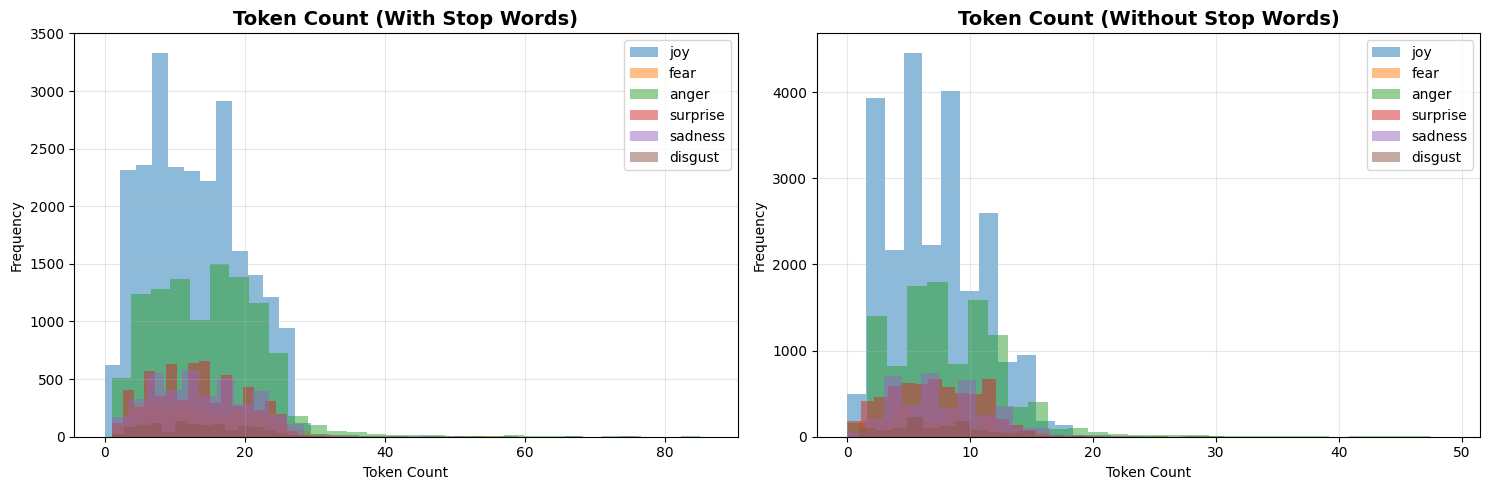

MOST COMMON WORDS (After Stop Word Removal)

--- JOY ---
  name: 3169
  like: 1824
  im: 1762
  love: 1673
  good: 1353
  thats: 998
  get: 973
  thank: 952
  would: 911
  one: 906
  dont: 899
  thanks: 896
  really: 809
  lol: 798
  youre: 705

--- FEAR ---
  im: 240
  name: 136
  like: 110
  get: 105
  dont: 98
  still: 79
  one: 73
  scared: 69
  going: 69
  afraid: 65
  back: 65
  would: 59
  got: 58
  really: 55
  head: 53

--- ANGER ---
  name: 1040
  dont: 1021
  like: 809
  im: 654
  people: 653
  get: 540
  cant: 469
  even: 446
  one: 410
  thats: 406
  youre: 363
  would: 362
  think: 360
  really: 307
  know: 300

--- SURPRISE ---
  name: 947
  im: 488
  like: 461
  dont: 418
  know: 357
  would: 305
  think: 285
  thats: 247
  get: 246
  people: 236
  one: 235
  oh: 215
  really: 193
  cant: 191
  see: 187

--- SADNESS ---
  name: 482
  im: 428
  sorry: 306
  like: 272
  dont: 244
  get: 181
  bad: 176
  sad: 167
  one: 158
  really: 148
  thats: 146
  people: 141
  feel: 

In [21]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for emotion in train_df['emotion'].unique():
    data = train_df[train_df['emotion'] == emotion]['token_count']
    axes[0].hist(data, alpha=0.5, label=emotion, bins=30)
axes[0].set_title('Token Count (With Stop Words)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Token Count')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(alpha=0.3)

for emotion in train_df['emotion'].unique():
    data = train_df[train_df['emotion'] == emotion]['token_count_no_stop']
    axes[1].hist(data, alpha=0.5, label=emotion, bins=30)
axes[1].set_title('Token Count (Without Stop Words)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Token Count')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Most common words after stopword removal
print("MOST COMMON WORDS (After Stop Word Removal)")
for emotion in train_df['emotion'].unique():
    tokens = [t for tlist in train_df[train_df['emotion'] == emotion]['tokens_no_stop'] for t in tlist]
    top = Counter(tokens).most_common(15)
    print(f"\n--- {emotion.upper()} ---")
    for word, count in top:
        print(f"  {word}: {count}")

print("\n✓ Basic text processing complete")


# Feature Engineering Steps
___

In [22]:
# Punctuation-based features
def count_punctuation(text):
    """Count various punctuation marks (emotional indicators)"""
    if not text:
        return 0, 0, 0, 0
    exclamation = text.count('!')
    question = text.count('?')
    period = text.count('.')
    ellipsis = text.count('...')
    return exclamation, question, period, ellipsis

# Apply to train
train_df[['exclamation_count', 'question_count', 'period_count', 'ellipsis_count']] = \
    train_df['text'].apply(lambda x: pd.Series(count_punctuation(x)))

# Apply to test
test_df[['exclamation_count', 'question_count', 'period_count', 'ellipsis_count']] = \
    test_df['text'].apply(lambda x: pd.Series(count_punctuation(x)))

In [23]:
# Capitalization-based features
def capital_features(text):
    """Count capitalized words (intensity indicators)"""
    if not isinstance(text, str) or not text:
        return 0, 0
    words = text.split()
    cap_words = sum(1 for word in words if word.isupper() and len(word) > 1)
    cap_ratio = cap_words / len(words) if words else 0
    return cap_words, cap_ratio

train_df[['capital_words', 'capital_ratio']] = \
    train_df['text'].apply(lambda x: pd.Series(capital_features(x)))

test_df[['capital_words', 'capital_ratio']] = \
    test_df['text'].apply(lambda x: pd.Series(capital_features(x)))


Challengues:

This is was a callenging secrtion for me as, when i tried using the nkl library to download stopwords, I kept encountering SSL errors that prevented the download from completing successfully. After several attempts to resolve the SSL issues.
I decided to manually create a list of common English stopwords to proceed with the text cleaning process.
This workaround allowed me to continue with the analysis without being hindered by the technical difficulties associated with the NLTK library.

In [24]:
# Sentiment Polarity Features
# Simple sentiment word lists
positive_words = set(['good', 'great', 'awesome', 'amazing', 'excellent', 'love', 'happy', 
                      'best', 'wonderful', 'fantastic', 'perfect', 'beautiful', 'nice', 
                      'glad', 'fun', 'enjoy', 'laugh', 'smile', 'joy', 'thanks', 'thank'])

negative_words = set(['bad', 'terrible', 'awful', 'horrible', 'hate', 'sad', 'worst', 
                      'angry', 'stupid', 'sucks', 'disgusting', 'scary', 'fear', 'death',
                      'kill', 'dead', 'pain', 'hurt', 'cry', 'sick', 'wrong', 'fail'])

def sentiment_features(tokens):
    """Count positive and negative words"""
    if not tokens:
        return 0, 0, 0
    pos_count = sum(1 for word in tokens if word.lower() in positive_words)
    neg_count = sum(1 for word in tokens if word.lower() in negative_words)
    sentiment_score = pos_count - neg_count
    return pos_count, neg_count, sentiment_score

train_df[['positive_words', 'negative_words', 'sentiment_score']] = \
    train_df['tokens_no_stop'].apply(lambda x: pd.Series(sentiment_features(x)))

test_df[['positive_words', 'negative_words', 'sentiment_score']] = \
    test_df['tokens_no_stop'].apply(lambda x: pd.Series(sentiment_features(x)))




In [25]:
# Lexical Diversity Features

def lexical_diversity(tokens):
    """Measure vocabulary richness"""
    if not tokens or len(tokens) == 0:
        return 0, 0
    unique_words = len(set(tokens))
    diversity = unique_words / len(tokens) if tokens else 0
    return unique_words, diversity

train_df[['unique_words', 'lexical_diversity']] = \
    train_df['tokens_no_stop'].apply(lambda x: pd.Series(lexical_diversity(x)))

test_df[['unique_words', 'lexical_diversity']] = \
    test_df['tokens_no_stop'].apply(lambda x: pd.Series(lexical_diversity(x)))


In [26]:
# Word Length Features

def avg_word_length(tokens):
    """Calculate average word length"""
    if not tokens:
        return 0
    return sum(len(word) for word in tokens) / len(tokens) if tokens else 0

train_df['avg_word_length'] = train_df['tokens_no_stop'].apply(avg_word_length)
test_df['avg_word_length'] = test_df['tokens_no_stop'].apply(avg_word_length)

In [27]:
# Hashtag Features

train_df['hashtag_count'] = train_df['hashtags'].apply(len)
test_df['hashtag_count'] = test_df['hashtags'].apply(len)

In [28]:
# Summary of all features

feature_cols = [
    'word_count', 'token_count_no_stop', 'cleaned_length',
    'exclamation_count', 'question_count', 'period_count', 'ellipsis_count',
    'capital_words', 'capital_ratio',
    'positive_words', 'negative_words', 'sentiment_score',
    'unique_words', 'lexical_diversity',
    'avg_word_length', 'hashtag_count'
]

print(f"\nTotal features created: {len(feature_cols)}")
print("\nFeature list:")
for i, feat in enumerate(feature_cols, 1):
    print(f"  {i}. {feat}")

print("\nFeature statistics (Training set):")
print(train_df[feature_cols].describe())


Total features created: 16

Feature list:
  1. word_count
  2. token_count_no_stop
  3. cleaned_length
  4. exclamation_count
  5. question_count
  6. period_count
  7. ellipsis_count
  8. capital_words
  9. capital_ratio
  10. positive_words
  11. negative_words
  12. sentiment_score
  13. unique_words
  14. lexical_diversity
  15. avg_word_length
  16. hashtag_count

Feature statistics (Training set):
         word_count  token_count_no_stop  cleaned_length  exclamation_count  \
count  47890.000000         47890.000000    47890.000000       47890.000000   
mean      13.490436             7.546022       70.937294           0.211067   
std        7.276106             4.115903       39.858337           0.656257   
min        0.000000             0.000000        0.000000           0.000000   
25%        8.000000             4.000000       40.000000           0.000000   
50%       13.000000             7.000000       67.000000           0.000000   
75%       19.000000            10.00000

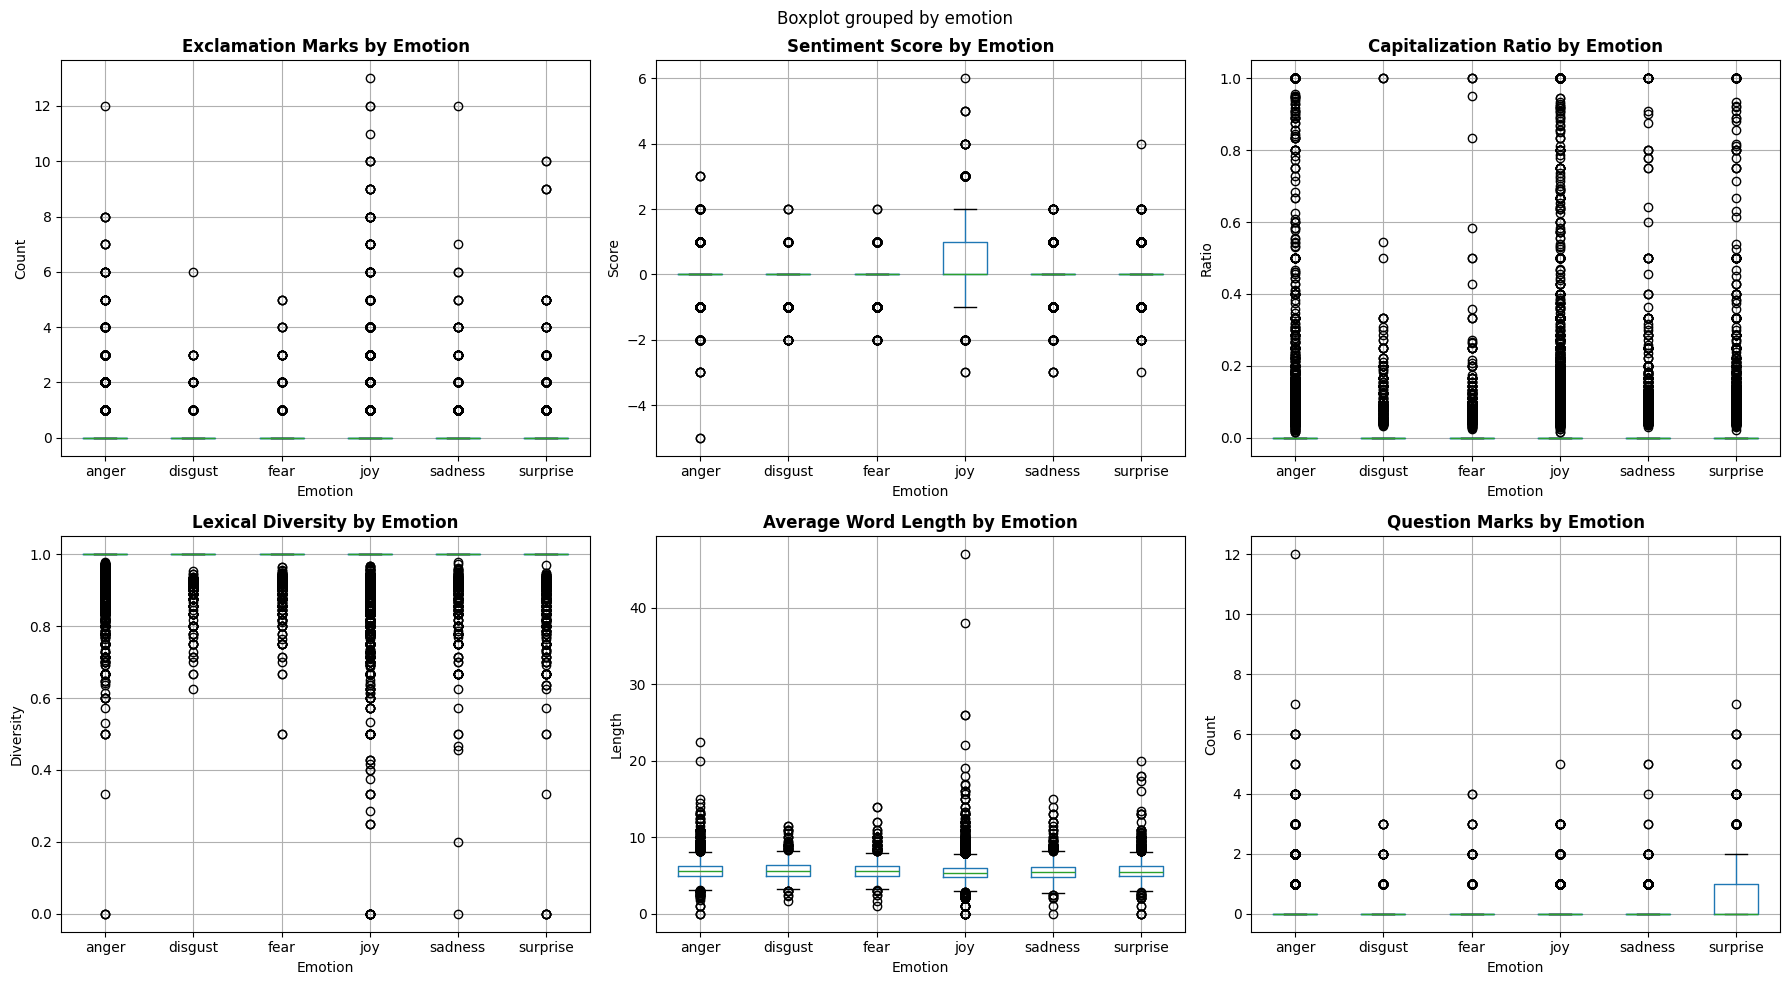

In [29]:
# Visualize feature distributions by emotion
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Exclamation marks by emotion
train_df.boxplot(column='exclamation_count', by='emotion', ax=axes[0, 0])
axes[0, 0].set_title('Exclamation Marks by Emotion', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Emotion')
axes[0, 0].set_ylabel('Count')

# 2. Sentiment score by emotion
train_df.boxplot(column='sentiment_score', by='emotion', ax=axes[0, 1])
axes[0, 1].set_title('Sentiment Score by Emotion', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Emotion')
axes[0, 1].set_ylabel('Score')

# 3. Capital ratio by emotion
train_df.boxplot(column='capital_ratio', by='emotion', ax=axes[0, 2])
axes[0, 2].set_title('Capitalization Ratio by Emotion', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Emotion')
axes[0, 2].set_ylabel('Ratio')

# 4. Lexical diversity by emotion
train_df.boxplot(column='lexical_diversity', by='emotion', ax=axes[1, 0])
axes[1, 0].set_title('Lexical Diversity by Emotion', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Emotion')
axes[1, 0].set_ylabel('Diversity')

# 5. Average word length by emotion
train_df.boxplot(column='avg_word_length', by='emotion', ax=axes[1, 1])
axes[1, 1].set_title('Average Word Length by Emotion', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Emotion')
axes[1, 1].set_ylabel('Length')

# 6. Question marks by emotion
train_df.boxplot(column='question_count', by='emotion', ax=axes[1, 2])
axes[1, 2].set_title('Question Marks by Emotion', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Emotion')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [30]:
# Feature Correlation with Emotions

print("FEATURE IMPORTANCE (Correlation with Emotions)")

# Calculate mean feature values per emotion
emotion_feature_means = train_df.groupby('emotion')[feature_cols].mean()
print("\nMean feature values by emotion:")
print(emotion_feature_means)

FEATURE IMPORTANCE (Correlation with Emotions)

Mean feature values by emotion:
          word_count  token_count_no_stop  cleaned_length  exclamation_count  \
emotion                                                                        
anger      14.782869             8.409669       79.637367           0.173462   
disgust    13.449704             7.567202       71.585799           0.107354   
fear       14.383275             7.697362       74.546541           0.109009   
joy        12.821952             7.229735       66.752658           0.277094   
sadness    13.793428             7.658940       72.287315           0.108762   
surprise   13.355357             7.150931       69.858621           0.141060   

          question_count  period_count  ellipsis_count  capital_words  \
emotion                                                                 
anger           0.148214      1.177857        0.061436       0.374696   
disgust         0.094675      1.131868        0.066779      

In [31]:
print("\n Feature engineering complete!")
print(f" Created {len(feature_cols)} numerical features")
print(f" Training set shape: {train_df[feature_cols].shape}")
print(f" Test set shape: {test_df[feature_cols].shape}")


 Feature engineering complete!
 Created 16 numerical features
 Training set shape: (47890, 16)
 Test set shape: (16281, 16)


### DATA QUALITY CHECK
___

In [32]:
print("\n1. MISSING VALUES")

print("\nTraining Set:")
missing_train = train_df.isnull().sum()
missing_train_pct = (missing_train / len(train_df) * 100).round(2)
missing_summary_train = pd.DataFrame({
    'Missing Count': missing_train,
    'Percentage': missing_train_pct
})
print(missing_summary_train[missing_summary_train['Missing Count'] > 0])

print("\nTest Set:")
missing_test = test_df.isnull().sum()
missing_test_pct = (missing_test / len(test_df) * 100).round(2)
missing_summary_test = pd.DataFrame({
    'Missing Count': missing_test,
    'Percentage': missing_test_pct
})
print(missing_summary_test[missing_summary_test['Missing Count'] > 0])

# Check if test set has emotion labels (should be missing)
if test_df['emotion'].isnull().all():
    print("\n Test set emotions are correctly missing (as expected)")
else:
    print("\n WARNING: Test set has emotion labels (potential data leakage)")


1. MISSING VALUES

Training Set:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

Test Set:
         Missing Count  Percentage
emotion          16281       100.0

 Test set emotions are correctly missing (as expected)


In [33]:

print("2. DATA TYPE VALIDATION")

print("\nTraining Set Data Types:")
print(train_df.dtypes)

print("\nTest Set Data Types:")
print(test_df.dtypes)

# Verify feature columns are numeric
feature_cols = [
    'word_count', 'token_count_no_stop', 'cleaned_length',
    'exclamation_count', 'question_count', 'period_count', 'ellipsis_count',
    'capital_words', 'capital_ratio',
    'positive_words', 'negative_words', 'sentiment_score',
    'unique_words', 'lexical_diversity',
    'avg_word_length', 'hashtag_count'
]

print("\nFeature Column Types:")
for col in feature_cols:
    train_type = train_df[col].dtype
    test_type = test_df[col].dtype
    match = "ALL MATCH" if train_type == test_type else "MISMATCH"
    print(f"  {match} {col}: train={train_type}, test={test_type}")

2. DATA TYPE VALIDATION

Training Set Data Types:
id                      object
text                    object
hashtags                object
emotion                 object
split                   object
cleaned_text            object
text_length              int64
cleaned_length           int64
word_count               int64
tokens                  object
tokens_no_stop          object
token_count              int64
token_count_no_stop      int64
exclamation_count        int64
question_count           int64
period_count             int64
ellipsis_count           int64
capital_words          float64
capital_ratio          float64
positive_words           int64
negative_words           int64
sentiment_score          int64
unique_words           float64
lexical_diversity      float64
avg_word_length        float64
hashtag_count            int64
dtype: object

Test Set Data Types:
id                      object
text                    object
hashtags                object
emotion        

In [34]:
print("3. EMPTY & INVALID TEXT CHECK")

# Empty original text
empty_original_train = train_df[train_df['text'].str.strip() == '']
empty_original_test = test_df[test_df['text'].str.strip() == '']
print(f"\nEmpty original texts:")
print(f"  Training: {len(empty_original_train)} ({len(empty_original_train)/len(train_df)*100:.2f}%)")
print(f"  Test: {len(empty_original_test)} ({len(empty_original_test)/len(test_df)*100:.2f}%)")

# Empty cleaned text
empty_cleaned_train = train_df[train_df['cleaned_text'] == '']
empty_cleaned_test = test_df[test_df['cleaned_text'] == '']
print(f"\nEmpty cleaned texts:")
print(f"  Training: {len(empty_cleaned_train)} ({len(empty_cleaned_train)/len(train_df)*100:.2f}%)")
print(f"  Test: {len(empty_cleaned_test)} ({len(empty_cleaned_test)/len(test_df)*100:.2f}%)")

if len(empty_cleaned_train) > 0:
    print(f"\nEmpty cleaned text examples (training):")
    for idx, row in empty_cleaned_train.head(5).iterrows():
        print(f"  ID: {row['id']}, Original: '{row['text']}', Emotion: {row['emotion']}")

# Zero word count
zero_words_train = train_df[train_df['word_count'] == 0]
zero_words_test = test_df[test_df['word_count'] == 0]
print(f"\nZero word count:")
print(f"  Training: {len(zero_words_train)} ({len(zero_words_train)/len(train_df)*100:.2f}%)")
print(f"  Test: {len(zero_words_test)} ({len(zero_words_test)/len(test_df)*100:.2f}%)")

3. EMPTY & INVALID TEXT CHECK

Empty original texts:
  Training: 0 (0.00%)
  Test: 0 (0.00%)

Empty cleaned texts:
  Training: 3 (0.01%)
  Test: 1 (0.01%)

Empty cleaned text examples (training):
  ID: 0x324949, Original: '(:)', Emotion: joy
  ID: 0xbfb5f2, Original: ':^)', Emotion: joy
  ID: 0x9a6b44, Original: ':((', Emotion: joy

Zero word count:
  Training: 3 (0.01%)
  Test: 1 (0.01%)


In [35]:
print("4. OUTLIER DETECTION")

def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("\nOutliers in key features (Training set):")
outlier_cols = ['word_count', 'exclamation_count', 'capital_ratio', 'sentiment_score']
for col in outlier_cols:
    count, lower, upper = detect_outliers_iqr(train_df, col)
    print(f"  {col}: {count} outliers ({count/len(train_df)*100:.2f}%) [bounds: {lower:.2f}, {upper:.2f}]")

# Show extreme values
print("\nExtreme word counts (Training):")
print(f"  Maximum: {train_df['word_count'].max()} words")
print(f"  Top 5 longest texts:")
longest_texts = train_df.nlargest(5, 'word_count')[['id', 'emotion', 'word_count', 'text']]
for idx, row in longest_texts.iterrows():
    text_preview = row['text'][:100] + "..." if len(row['text']) > 100 else row['text']
    print(f"    - {row['word_count']} words ({row['emotion']}): {text_preview}")

4. OUTLIER DETECTION

Outliers in key features (Training set):
  word_count: 75 outliers (0.16%) [bounds: -25.00, 52.00]
  exclamation_count: 6720 outliers (14.03%) [bounds: 0.00, 0.00]
  capital_ratio: 9794 outliers (20.45%) [bounds: 0.00, 0.00]
  sentiment_score: 11679 outliers (24.39%) [bounds: 0.00, 0.00]

Extreme word counts (Training):
  Maximum: 86 words
  Top 5 longest texts:
    - 86 words (fear): On march 25 2008 i broke my first bones i broke my hand and 1 finger so far but after i broke it i s...
    - 85 words (anger): After obediently cooperating, I was taken out in the middle of the night for transfer to the Asia In...
    - 84 words (anger): How lazy can certain “Hei” regions get? Back in December when the outbreak was severe, I was in Hang...
    - 84 words (anger): When students from Tianjin’s 1969 and 1970 cohorts went “up to the mountains and down to the country...
    - 80 words (anger): Had to scream my lungs out while the guy just let the crowd pass my bag to me,

In [36]:

print("5. DUPLICATE ANALYSIS")

# Duplicate IDs
dup_ids_train = train_df[train_df.duplicated(subset='id', keep=False)]
dup_ids_test = test_df[test_df.duplicated(subset='id', keep=False)]
print(f"\nDuplicate IDs:")
print(f"  Training: {len(dup_ids_train)} ({len(dup_ids_train)/len(train_df)*100:.2f}%)")
print(f"  Test: {len(dup_ids_test)} ({len(dup_ids_test)/len(test_df)*100:.2f}%)")

# Duplicate cleaned text
dup_text_train = train_df[train_df.duplicated(subset='cleaned_text', keep=False)]
dup_text_test = test_df[test_df.duplicated(subset='cleaned_text', keep=False)]
print(f"\nDuplicate cleaned texts:")
print(f"  Training: {len(dup_text_train)} ({len(dup_text_train)/len(train_df)*100:.2f}%)")
print(f"  Test: {len(dup_text_test)} ({len(dup_text_test)/len(test_df)*100:.2f}%)")

# Check if same text has different emotions
if len(dup_text_train) > 0:
    print("\nSame text with different emotions:")
    conflicting = 0
    for text in dup_text_train['cleaned_text'].unique()[:10]:
        emotions = train_df[train_df['cleaned_text'] == text]['emotion'].unique()
        if len(emotions) > 1:
            conflicting += 1
            print(f"  '{text[:50]}...' → Emotions: {emotions.tolist()}")
    
    total_dup_texts = len(dup_text_train['cleaned_text'].unique())
    print(f"\nTotal unique duplicate texts: {total_dup_texts}")
    print(f"Texts with conflicting emotions: {conflicting} ({conflicting/total_dup_texts*100:.2f}%)")

5. DUPLICATE ANALYSIS

Duplicate IDs:
  Training: 0 (0.00%)
  Test: 0 (0.00%)

Duplicate cleaned texts:
  Training: 1278 (2.67%)
  Test: 238 (1.46%)

Same text with different emotions:
  'anyone can be brave but you just have to last mins...' → Emotions: ['joy', 'fear']

Total unique duplicate texts: 606
Texts with conflicting emotions: 1 (0.17%)


In [37]:
print("6. FEATURE QUALITY CHECK")

# Check for infinite values
print("\nInfinite values in features:")
for col in feature_cols:
    inf_train = np.isinf(train_df[col]).sum()
    inf_test = np.isinf(test_df[col]).sum()
    if inf_train > 0 or inf_test > 0:
        print(f"  {col}: train={inf_train}, test={inf_test}")

# Check for NaN in features
print("\nNaN values in features:")
for col in feature_cols:
    nan_train = train_df[col].isna().sum()
    nan_test = test_df[col].isna().sum()
    if nan_train > 0 or nan_test > 0:
        print(f"  {col}: train={nan_train}, test={nan_test}")

# Feature ranges
print("\nFeature value ranges (Training set):")
print(train_df[feature_cols].describe().loc[['min', 'max']])

# Check for constant features
print("\nConstant features (zero variance):")
for col in feature_cols:
    if train_df[col].nunique() == 1:
        print(f"  ⚠ {col}: constant value = {train_df[col].iloc[0]}")

6. FEATURE QUALITY CHECK

Infinite values in features:

NaN values in features:

Feature value ranges (Training set):
     word_count  token_count_no_stop  cleaned_length  exclamation_count  \
min         0.0                  0.0             0.0                0.0   
max        86.0                 49.0           475.0               13.0   

     question_count  period_count  ellipsis_count  capital_words  \
min             0.0           0.0             0.0            0.0   
max            12.0          45.0            15.0           23.0   

     capital_ratio  positive_words  negative_words  sentiment_score  \
min            0.0             0.0             0.0             -5.0   
max            1.0             6.0             5.0              6.0   

     unique_words  lexical_diversity  avg_word_length  hashtag_count  
min           0.0                0.0              0.0            0.0  
max          46.0                1.0             47.0           14.0  

Constant features (zero

In [38]:

print("7. CLASS BALANCE CHECK")

emotion_counts = train_df['emotion'].value_counts()
emotion_pct = (emotion_counts / len(train_df) * 100).round(2)

class_balance = pd.DataFrame({
    'Count': emotion_counts,
    'Percentage': emotion_pct
})
print("\nEmotion distribution:")
print(class_balance)

# Calculate imbalance ratio
max_class = emotion_counts.max()
min_class = emotion_counts.min()
imbalance_ratio = max_class / min_class
print(f"\nImbalance ratio: {imbalance_ratio:.2f}:1 (max/min)")

if imbalance_ratio > 10:
    print("WARNING: Severe class imbalance detected!")
elif imbalance_ratio > 5:
    print("Moderate class imbalance detected")
else:
    print("Class distribution is relatively balanced")

7. CLASS BALANCE CHECK

Emotion distribution:
          Count  Percentage
emotion                    
joy       23797       49.69
anger     10694       22.33
surprise   6281       13.12
sadness    3926        8.20
fear       2009        4.20
disgust    1183        2.47

Imbalance ratio: 20.12:1 (max/min)


In [39]:
print("8. TRAIN-TEST CONSISTENCY CHECK")

print("\nFeature statistics comparison:")
comparison = pd.DataFrame({
    'Train Mean': train_df[feature_cols].mean(),
    'Test Mean': test_df[feature_cols].mean(),
    'Difference %': ((test_df[feature_cols].mean() - train_df[feature_cols].mean()) / train_df[feature_cols].mean() * 100).round(2)
})
print(comparison)

# Check for significant distribution shifts
print("\nFeatures with >20% distribution shift:")
large_shifts = comparison[abs(comparison['Difference %']) > 20]
if len(large_shifts) > 0:
    print(large_shifts)
    print("\n WARNING: Significant distribution shifts detected!")
else:
    print("No significant distribution shifts detected")

8. TRAIN-TEST CONSISTENCY CHECK

Feature statistics comparison:
                     Train Mean  Test Mean  Difference %
word_count            13.490436  14.373626          6.55
token_count_no_stop    7.546022   8.115226          7.54
cleaned_length        70.937294  76.199374          7.42
exclamation_count      0.211067   0.215773          2.23
question_count         0.131593   0.143603          9.13
period_count           1.100439   1.137707          3.39
ellipsis_count         0.062978   0.061851         -1.79
capital_words          0.331698   0.277010        -16.49
capital_ratio          0.030582   0.024863        -18.70
positive_words         0.211840   0.203919         -3.74
negative_words         0.078952   0.082427          4.40
sentiment_score        0.132888   0.121491         -8.58
unique_words           7.389622   7.936306          7.40
lexical_diversity      0.984101   0.983519         -0.06
avg_word_length        5.558241   5.586734          0.51
hashtag_count          0

In [40]:
print("9. DATA INTEGRITY SUMMARY")

issues = []

# Collect all issues
if len(empty_cleaned_train) > 0:
    issues.append(f"Empty cleaned texts in training: {len(empty_cleaned_train)}")
if len(empty_cleaned_test) > 0:
    issues.append(f"Empty cleaned texts in test: {len(empty_cleaned_test)}")
if len(dup_ids_train) > 0:
    issues.append(f"Duplicate IDs in training: {len(dup_ids_train)}")
if len(dup_ids_test) > 0:
    issues.append(f"Duplicate IDs in test: {len(dup_ids_test)}")
if imbalance_ratio > 5:
    issues.append(f"Class imbalance ratio: {imbalance_ratio:.2f}:1")

print(f"\nTotal issues found: {len(issues)}")
if len(issues) > 0:
    print("\nIssues:")
    for i, issue in enumerate(issues, 1):
        print(f"  {i}. {issue}")
else:
    print("\n✓ No critical issues found!")


print("QUALITY CHECK COMPLETE")

print(f"\nDataset Summary:")
print(f"  Training samples: {len(train_df)}")
print(f"  Test samples: {len(test_df)}")
print(f"  Total features: {len(feature_cols)}")
print(f"  Emotion classes: {train_df['emotion'].nunique()}")
print(f"\n✓ Ready for model training")

9. DATA INTEGRITY SUMMARY

Total issues found: 3

Issues:
  1. Empty cleaned texts in training: 3
  2. Empty cleaned texts in test: 1
  3. Class imbalance ratio: 20.12:1
QUALITY CHECK COMPLETE

Dataset Summary:
  Training samples: 47890
  Test samples: 16281
  Total features: 16
  Emotion classes: 6

✓ Ready for model training


# TEXT VECTORIZATION WITH TF-IDF
___

In [41]:

print("TEXT VECTORIZATION - TF-IDF")

from sklearn.feature_extraction.text import TfidfVectorizer

# Reconstruct text from tokens (without stopwords)
print("\n1. Reconstructing text from tokens...")
train_df['text_for_tfidf'] = train_df['tokens_no_stop'].apply(lambda x: ' '.join(x))
test_df['text_for_tfidf'] = test_df['tokens_no_stop'].apply(lambda x: ' '.join(x))
print("✓ Text reconstructed")

# Initialize TF-IDF vectorizer
print("\n2. Initializing TF-IDF vectorizer...")
tfidf = TfidfVectorizer(
    max_features=3000,      
    min_df=5,               
    max_df=0.8,             
    ngram_range=(1, 2),     
    sublinear_tf=True       
)
print("✓ Vectorizer initialized")

# Fit on training data and transform both sets
print("\n3. Fitting TF-IDF on training data...")
X_train_tfidf = tfidf.fit_transform(train_df['text_for_tfidf'])
print(f"✓ Training TF-IDF shape: {X_train_tfidf.shape}")

print("\n4. Transforming test data...")
X_test_tfidf = tfidf.transform(test_df['text_for_tfidf'])
print(f"✓ Test TF-IDF shape: {X_test_tfidf.shape}")

print(f"\n✓ Vocabulary size: {len(tfidf.vocabulary_)}")
print(f"✓ Feature names sample: {tfidf.get_feature_names_out()[:10].tolist()}")

TEXT VECTORIZATION - TF-IDF

1. Reconstructing text from tokens...
✓ Text reconstructed

2. Initializing TF-IDF vectorizer...
✓ Vectorizer initialized

3. Fitting TF-IDF on training data...
✓ Training TF-IDF shape: (47890, 3000)

4. Transforming test data...
✓ Test TF-IDF shape: (16281, 3000)

✓ Vocabulary size: 3000
✓ Feature names sample: ['ability', 'able', 'abortion', 'about', 'absolute', 'absolutely', 'abuse', 'abusive', 'accept', 'accepted']


In [42]:

print("COMBINING TF-IDF WITH ENGINEERED FEATURES")

from scipy.sparse import hstack

# Get engineered features
feature_cols = [
    'word_count', 'token_count_no_stop', 'cleaned_length',
    'exclamation_count', 'question_count', 'period_count', 'ellipsis_count',
    'capital_words', 'capital_ratio',
    'positive_words', 'negative_words', 'sentiment_score',
    'unique_words', 'lexical_diversity',
    'avg_word_length', 'hashtag_count'
]

X_train_features = train_df[feature_cols].values
X_test_features = test_df[feature_cols].values

print(f"\nEngineered features shape:")
print(f"  Training: {X_train_features.shape}")
print(f"  Test: {X_test_features.shape}")

# Combine TF-IDF with engineered features
print("\nCombining features...")
X_train_combined = hstack([X_train_tfidf, X_train_features])
X_test_combined = hstack([X_test_tfidf, X_test_features])

print(f"\n Combined features shape:")
print(f"  Training: {X_train_combined.shape}")
print(f"  Test: {X_test_combined.shape}")

# Get target variable
y_train = train_df['emotion']

print(f"\n Target variable shape: {y_train.shape}")
print(f"Classes: {y_train.unique().tolist()}")

COMBINING TF-IDF WITH ENGINEERED FEATURES

Engineered features shape:
  Training: (47890, 16)
  Test: (16281, 16)

Combining features...

 Combined features shape:
  Training: (47890, 3016)
  Test: (16281, 3016)

 Target variable shape: (47890,)
Classes: ['joy', 'fear', 'anger', 'surprise', 'sadness', 'disgust']


In [43]:
# Split data into training and validation sets

from sklearn.model_selection import train_test_split

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_combined, 
    y_train, 
    test_size=0.2,        
    random_state=42,
    stratify=y_train        
)

print(f"\nData split:")
print(f"  Training set: {X_train_final.shape[0]} samples ({X_train_final.shape[0]/len(train_df)*100:.1f}%)")
print(f"  Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(train_df)*100:.1f}%)")

# Check class distribution in splits
print(f"\nClass distribution in training:")
print(y_train_final.value_counts(normalize=True).round(3))

print(f"\nClass distribution in validation:")
print(y_val.value_counts(normalize=True).round(3))

print("\n Validation split created successfully")


Data split:
  Training set: 38312 samples (80.0%)
  Validation set: 9578 samples (20.0%)

Class distribution in training:
emotion
joy         0.497
anger       0.223
surprise    0.131
sadness     0.082
fear        0.042
disgust     0.025
Name: proportion, dtype: float64

Class distribution in validation:
emotion
joy         0.497
anger       0.223
surprise    0.131
sadness     0.082
fear        0.042
disgust     0.025
Name: proportion, dtype: float64

 Validation split created successfully


## 3. Model Implementation Steps
_____

In [44]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import time

model_results = {}

In [45]:

# Logistic Regression
print("\nTraining model...")
start_time = time.time()

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced',  
    C=1.0,
    solver='saga',
    n_jobs=-1
)

lr_model.fit(X_train_final, y_train_final)
train_time = time.time() - start_time

print(f"✓ Training completed in {train_time:.2f} seconds")

# Predictions
print("\nMaking predictions...")
y_train_pred_lr = lr_model.predict(X_train_final)
y_val_pred_lr = lr_model.predict(X_val)

# Evaluation
train_acc_lr = accuracy_score(y_train_final, y_train_pred_lr)
val_acc_lr = accuracy_score(y_val, y_val_pred_lr)
val_f1_lr = f1_score(y_val, y_val_pred_lr, average='weighted')

print(f"\n📊 RESULTS:")
print(f"  Training Accuracy: {train_acc_lr:.4f}")
print(f"  Validation Accuracy: {val_acc_lr:.4f}")
print(f"  Validation F1-Score: {val_f1_lr:.4f}")

# Store results
model_results['Logistic Regression'] = {
    'model': lr_model,
    'train_acc': train_acc_lr,
    'val_acc': val_acc_lr,
    'val_f1': val_f1_lr,
    'train_time': train_time,
    'predictions': y_val_pred_lr
}

print("\n Logistic Regression complete")


Training model...
✓ Training completed in 11.26 seconds

Making predictions...

📊 RESULTS:
  Training Accuracy: 0.4036
  Validation Accuracy: 0.3996
  Validation F1-Score: 0.4452

 Logistic Regression complete


/Users/hakeemhunte/Desktop/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [46]:
# Naive Bayes

print("\nTraining model...")
start_time = time.time()

from sklearn.preprocessing import MinMaxScaler

nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train_tfidf[y_train_final.index], y_train_final)
train_time = time.time() - start_time

print(f"✓ Training completed in {train_time:.2f} seconds")

# Predictions
print("\nMaking predictions...")
y_train_pred_nb = nb_model.predict(X_train_tfidf[y_train_final.index])
y_val_pred_nb = nb_model.predict(X_train_tfidf[y_val.index])

# Evaluation
train_acc_nb = accuracy_score(y_train_final, y_train_pred_nb)
val_acc_nb = accuracy_score(y_val, y_val_pred_nb)
val_f1_nb = f1_score(y_val, y_val_pred_nb, average='weighted')

print(f"\n RESULTS:")
print(f"  Training Accuracy: {train_acc_nb:.4f}")
print(f"  Validation Accuracy: {val_acc_nb:.4f}")
print(f"  Validation F1-Score: {val_f1_nb:.4f}")

# Store results
model_results['Naive Bayes'] = {
    'model': nb_model,
    'train_acc': train_acc_nb,
    'val_acc': val_acc_nb,
    'val_f1': val_f1_nb,
    'train_time': train_time,
    'predictions': y_val_pred_nb
}

print("\n Naive Bayes complete")


Training model...
✓ Training completed in 0.04 seconds

Making predictions...

 RESULTS:
  Training Accuracy: 0.6128
  Validation Accuracy: 0.5789
  Validation F1-Score: 0.5064

 Naive Bayes complete


In [47]:
# Linear SVM

print("\nTraining model...")
start_time = time.time()

svm_model = LinearSVC(
    max_iter=2000,
    random_state=42,
    class_weight='balanced',
    C=0.5,
    dual=False
)

svm_model.fit(X_train_final, y_train_final)
train_time = time.time() - start_time

print(f"✓ Training completed in {train_time:.2f} seconds")

# Predictions
print("\nMaking predictions...")
y_train_pred_svm = svm_model.predict(X_train_final)
y_val_pred_svm = svm_model.predict(X_val)

# Evaluation
train_acc_svm = accuracy_score(y_train_final, y_train_pred_svm)
val_acc_svm = accuracy_score(y_val, y_val_pred_svm)
val_f1_svm = f1_score(y_val, y_val_pred_svm, average='weighted')

print(f"\n RESULTS:")
print(f"  Training Accuracy: {train_acc_svm:.4f}")
print(f"  Validation Accuracy: {val_acc_svm:.4f}")
print(f"  Validation F1-Score: {val_f1_svm:.4f}")

# Store results
model_results['Linear SVM'] = {
    'model': svm_model,
    'train_acc': train_acc_svm,
    'val_acc': val_acc_svm,
    'val_f1': val_f1_svm,
    'train_time': train_time,
    'predictions': y_val_pred_svm
}

print("\n✓ Linear SVM complete")


Training model...
✓ Training completed in 2.94 seconds

Making predictions...

 RESULTS:
  Training Accuracy: 0.6637
  Validation Accuracy: 0.5611
  Validation F1-Score: 0.5773

✓ Linear SVM complete


In [48]:
# Random Forest
print("\nTraining model...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1,
    verbose=0
)

rf_model.fit(X_train_final, y_train_final)
train_time = time.time() - start_time

print(f"✓ Training completed in {train_time:.2f} seconds")

# Predictions
print("\nMaking predictions...")
y_train_pred_rf = rf_model.predict(X_train_final)
y_val_pred_rf = rf_model.predict(X_val)

# Evaluation
train_acc_rf = accuracy_score(y_train_final, y_train_pred_rf)
val_acc_rf = accuracy_score(y_val, y_val_pred_rf)
val_f1_rf = f1_score(y_val, y_val_pred_rf, average='weighted')

print(f"\n RESULTS:")
print(f"  Training Accuracy: {train_acc_rf:.4f}")
print(f"  Validation Accuracy: {val_acc_rf:.4f}")
print(f"  Validation F1-Score: {val_f1_rf:.4f}")

# Store results
model_results['Random Forest'] = {
    'model': rf_model,
    'train_acc': train_acc_rf,
    'val_acc': val_acc_rf,
    'val_f1': val_f1_rf,
    'train_time': train_time,
    'predictions': y_val_pred_rf
}

print("\n Random Forest complete")


Training model...
✓ Training completed in 0.78 seconds

Making predictions...

 RESULTS:
  Training Accuracy: 0.4892
  Validation Accuracy: 0.4438
  Validation F1-Score: 0.4757

 Random Forest complete


### First Submition Evaluation 

In [49]:
# Summary of model performances
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Train Accuracy': [model_results[m]['train_acc'] for m in model_results.keys()],
    'Val Accuracy': [model_results[m]['val_acc'] for m in model_results.keys()],
    'Val F1-Score': [model_results[m]['val_f1'] for m in model_results.keys()],
    'Train Time (s)': [model_results[m]['train_time'] for m in model_results.keys()]
})

comparison_df = comparison_df.sort_values('Val F1-Score', ascending=False).reset_index(drop=True)

print("\n MODEL PERFORMANCE SUMMARY:")
print(comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model_info = model_results[best_model_name]

print(f"\n BEST MODEL: {best_model_name}")
print(f"   Validation Accuracy: {best_model_info['val_acc']:.4f}")
print(f"   Validation F1-Score: {best_model_info['val_f1']:.4f}")


 MODEL PERFORMANCE SUMMARY:
              Model  Train Accuracy  Val Accuracy  Val F1-Score  Train Time (s)
         Linear SVM        0.663682      0.561077      0.577300        2.938175
        Naive Bayes        0.612785      0.578931      0.506398        0.041894
      Random Forest        0.489220      0.443830      0.475650        0.780164
Logistic Regression        0.403555      0.399561      0.445227       11.257435

 BEST MODEL: Linear SVM
   Validation Accuracy: 0.5611
   Validation F1-Score: 0.5773


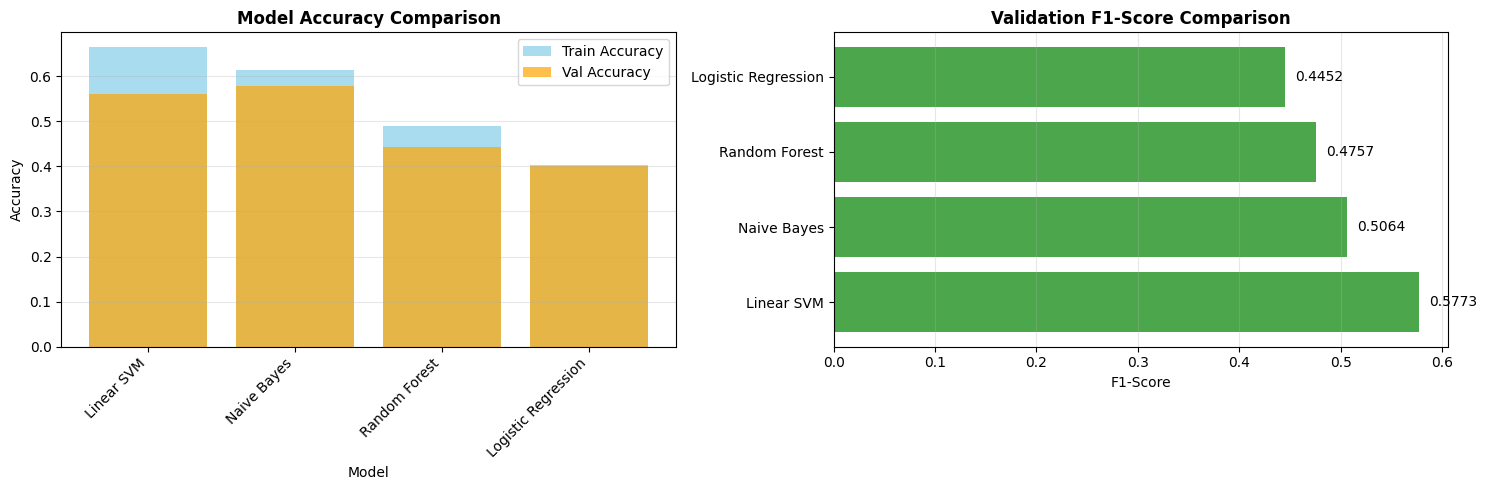

In [50]:
# Visualize model comparison

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Accuracy comparison
x_pos = range(len(comparison_df))
axes[0].bar(x_pos, comparison_df['Train Accuracy'], alpha=0.7, label='Train Accuracy', color='skyblue')
axes[0].bar(x_pos, comparison_df['Val Accuracy'], alpha=0.7, label='Val Accuracy', color='orange')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison', fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# 2. F1-Score comparison
axes[1].barh(comparison_df['Model'], comparison_df['Val F1-Score'], color='green', alpha=0.7)
axes[1].set_xlabel('F1-Score')
axes[1].set_title('Validation F1-Score Comparison', fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Add values on bars
for i, v in enumerate(comparison_df['Val F1-Score']):
    axes[1].text(v + 0.01, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()

In [51]:
# Detailed evaluation of the best model

print(f"DETAILED EVALUATION - {best_model_name.upper()}")


best_predictions = best_model_info['predictions']

# Classification Report
print("\n CLASSIFICATION REPORT:")
print(classification_report(y_val, best_predictions))

# Confusion Matrix
print("\nCONFUSION MATRIX:")
cm = confusion_matrix(y_val, best_predictions)
print(cm)


DETAILED EVALUATION - LINEAR SVM

 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       anger       0.54      0.45      0.49      2139
     disgust       0.11      0.25      0.15       237
        fear       0.24      0.44      0.31       402
         joy       0.77      0.69      0.73      4759
     sadness       0.34      0.37      0.35       785
    surprise       0.45      0.49      0.47      1256

    accuracy                           0.56      9578
   macro avg       0.41      0.45      0.42      9578
weighted avg       0.60      0.56      0.58      9578


CONFUSION MATRIX:
[[ 973  205  127  427  175  232]
 [  56   60   37   44   24   16]
 [  43   44  175   69   38   33]
 [ 445  150  238 3262  265  399]
 [ 120   55   83  170  289   68]
 [ 181   51   78  260   71  615]]


In [52]:
# Per-class performance
print("\nPER-CLASS PERFORMANCE:")
for emotion in sorted(y_train.unique()):
    emotion_mask = y_val == emotion
    emotion_acc = accuracy_score(y_val[emotion_mask], best_predictions[emotion_mask])
    emotion_count = emotion_mask.sum()
    print(f"  {emotion:12s}: {emotion_acc:.4f} ({emotion_count} samples)")


PER-CLASS PERFORMANCE:
  anger       : 0.4549 (2139 samples)
  disgust     : 0.2532 (237 samples)
  fear        : 0.4353 (402 samples)
  joy         : 0.6854 (4759 samples)
  sadness     : 0.3682 (785 samples)
  surprise    : 0.4896 (1256 samples)


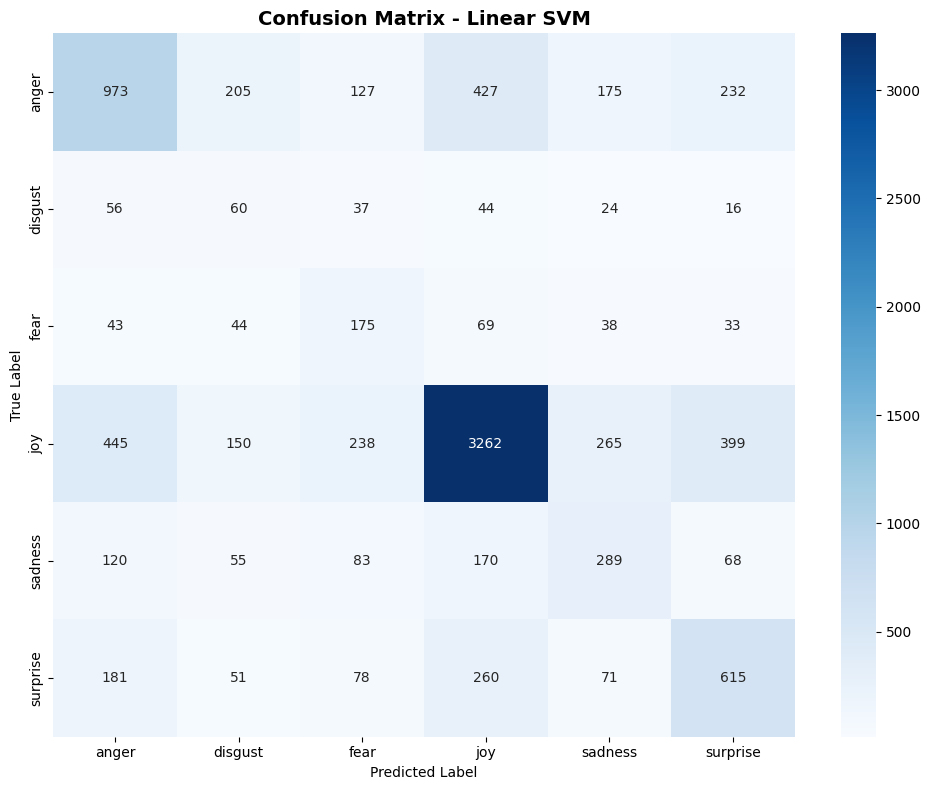

In [53]:
# Visualize Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y_train.unique()), 
            yticklabels=sorted(y_train.unique()))
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [54]:
# FINAL PREDICTIONS ON TEST SET

# Use the best model from your training
print(f"\nUsing best model: {best_model_name}")
print(f"Validation F1-Score: {best_model_info['val_f1']:.4f}")

# Get the best model
best_model = best_model_info['model']

print("\nMaking predictions on test set...")
if best_model_name == 'Naive Bayes':
    # Naive Bayes uses only TF-IDF features
    test_predictions = best_model.predict(X_test_tfidf)
else:
    # Other models use combined features
    test_predictions = best_model.predict(X_test_combined)

print(f"✓ Generated {len(test_predictions)} predictions")

# Show prediction distribution
print("\nPrediction distribution:")
pred_counts = pd.Series(test_predictions).value_counts()
print(pred_counts)
print(f"\nPercentage:")
print((pred_counts / len(test_predictions) * 100).round(2))


Using best model: Linear SVM
Validation F1-Score: 0.5773

Making predictions on test set...
✓ Generated 16281 predictions

Prediction distribution:
joy         6647
anger       3257
surprise    2179
fear        1664
sadness     1526
disgust     1008
Name: count, dtype: int64

Percentage:
joy         40.83
anger       20.00
surprise    13.38
fear        10.22
sadness      9.37
disgust      6.19
Name: count, dtype: float64


In [55]:


print("SAMPLE PREDICTIONS")

# Show some example predictions
sample_size = 10
sample_indices = np.random.choice(len(test_df), sample_size, replace=False)

print(f"\nRandom sample of {sample_size} predictions:\n")
for idx in sample_indices:
    text = test_df.iloc[idx]['text']
    pred = test_predictions[idx]
    post_id = test_df.iloc[idx]['id']
    text_preview = text[:80] + "..." if len(text) > 80 else text
    print(f"ID: {post_id}")
    print(f"Text: {text_preview}")
    print(f"Predicted Emotion: {pred}")
    print("-" * 80)

print(f"\n Ready to submit to competition!")

SAMPLE PREDICTIONS

Random sample of 10 predictions:

ID: 0xc79bae
Text: You called yourself a Met fan. THAT is embarrassing. Edit: called themselves a M...
Predicted Emotion: sadness
--------------------------------------------------------------------------------
ID: 0x2c220f
Text: [NAME]: I-I *love* what you’ve done with these poles.. [NAME]: *sniff* *sniff*
Predicted Emotion: joy
--------------------------------------------------------------------------------
ID: 0x4aa375
Text: Nah, reviewable offsides is pretty bad
Predicted Emotion: sadness
--------------------------------------------------------------------------------
ID: 0x3dcbd1
Text: Something went horribly wrong at the first one and I found my head empty, my tho...
Predicted Emotion: fear
--------------------------------------------------------------------------------
ID: 0x08364b
Text: You’ve got a lot to learn about this town, sweetie. 
Predicted Emotion: joy
----------------------------------------------------------------

## Second Submittion 

In [56]:
# deep learning model training model 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
import time

In [57]:
# Deep Leaning Models

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder

# Prepare data
print("\nPreparing data for DNN...")

# Use TF-IDF features (already created)
X_train_dnn = X_train_combined.toarray()  # Convert sparse to dense
X_test_dnn = X_test_combined.toarray()
y_train_dnn = y_train

print(f"X_train_dnn shape: {X_train_dnn.shape}")
print(f"X_test_dnn shape: {X_test_dnn.shape}")

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_dnn)
y_train_categorical = keras.utils.to_categorical(y_train_encoded)

print(f"Number of classes: {len(label_encoder.classes_)}")
print(f"Classes: {label_encoder.classes_}")

# Split for validation
X_train_dnn_split, X_val_dnn, y_train_dnn_split, y_val_dnn = train_test_split(
    X_train_dnn, y_train_categorical, 
    test_size=0.2, 
    random_state=42,
    stratify=y_train_encoded
)

print(f"\nTraining samples: {X_train_dnn_split.shape[0]}")
print(f"Validation samples: {X_val_dnn.shape[0]}")


Preparing data for DNN...
X_train_dnn shape: (47890, 3016)
X_test_dnn shape: (16281, 3016)
Number of classes: 6
Classes: ['anger' 'disgust' 'fear' 'joy' 'sadness' 'surprise']

Training samples: 38312
Validation samples: 9578


In [58]:
# Build DNN model

# Model parameters
input_dim = X_train_dnn.shape[1]
num_classes = len(label_encoder.classes_)

# Build model
input_layer = Input(shape=(input_dim,))

# Hidden layers with batch normalization and dropout
x = Dense(512, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)

# Output layer
output_layer = Dense(num_classes, activation='softmax')(x)

# Create model
dnn_model = Model(inputs=input_layer, outputs=output_layer)

# Compile
dnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
dnn_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3016)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,544,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,721,158 (6.57 MB)

 Trainable params: 1,719,366 (6.56 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [59]:
# Training DNN model

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001
)

# Train
print("\nStarting training...")
start_time = time.time()

history_dnn = dnn_model.fit(
    X_train_dnn_split, y_train_dnn_split,
    validation_data=(X_val_dnn, y_val_dnn),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

train_time_dnn = time.time() - start_time
print(f"\n DNN training completed in {train_time_dnn:.2f} seconds")

# Predictions
print("\nMaking predictions...")
y_val_pred_dnn = dnn_model.predict(X_val_dnn)
y_val_pred_dnn_classes = label_encoder.inverse_transform(np.argmax(y_val_pred_dnn, axis=1))
y_val_true_classes = label_encoder.inverse_transform(np.argmax(y_val_dnn, axis=1))

# Evaluation
val_acc_dnn = accuracy_score(y_val_true_classes, y_val_pred_dnn_classes)
val_f1_dnn = f1_score(y_val_true_classes, y_val_pred_dnn_classes, average='weighted')

print(f"\n DNN RESULTS:")
print(f"  Validation Accuracy: {val_acc_dnn:.4f}")
print(f"  Validation F1-Score: {val_f1_dnn:.4f}")


Starting training...
Epoch 1/50
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4796 - loss: 1.4028 - val_accuracy: 0.5274 - val_loss: 1.3373 - learning_rate: 0.0010
Epoch 2/50
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5298 - loss: 1.2579 - val_accuracy: 0.5703 - val_loss: 1.2432 - learning_rate: 0.0010
Epoch 3/50
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5491 - loss: 1.2176 - val_accuracy: 0.5198 - val_loss: 1.2473 - learning_rate: 0.0010
Epoch 4/50
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5577 - loss: 1.1944 - val_accuracy: 0.5775 - val_loss: 1.1629 - learning_rate: 0.0010
Epoch 5/50
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5755 - loss: 1.1579 - val_accuracy: 0.5981 - val_loss: 1.1307 - learning_rate: 0.0010
Epoch 6/50
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5855 - loss: 1.1351 - val_accuracy: 0.5755 - val_loss: 1.2066 - learning_rate: 0.0010
Epoch 7/50
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step

In [60]:
# Build BERT Model

# Install transformers if needed
try:
    import transformers
except:
    print("Installing transformers...")
    import sys
    !{sys.executable} -m pip install transformers

from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

print("Transformers library loaded")

/Users/hakeemhunte/Desktop/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Transformers library loaded


In [61]:
# Prepare data for BERT

# Use original text (not TF-IDF)
train_texts = train_df['cleaned_text'].tolist()
train_labels = train_df['emotion'].tolist()

# Encode labels for BERT
label_map = {label: idx for idx, label in enumerate(label_encoder.classes_)}
train_labels_encoded = [label_map[label] for label in train_labels]

# Split for validation
train_texts_split, val_texts, train_labels_split, val_labels = train_test_split(
    train_texts, train_labels_encoded,
    test_size=0.2,
    random_state=42,
    stratify=train_labels_encoded
)

print(f"Training samples: {len(train_texts_split)}")
print(f"Validation samples: {len(val_texts)}")

# Initialize BERT tokenizer
print("\nLoading BERT tokenizer...")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize
print("Tokenizing texts...")
max_length = 128

train_encodings = tokenizer(
    train_texts_split,
    truncation=True,
    padding=True,
    max_length=max_length,
    return_tensors='tf'
)

val_encodings = tokenizer(
    val_texts,
    truncation=True,
    padding=True,
    max_length=max_length,
    return_tensors='tf'
)
print("Tokenization complete")

Training samples: 38312
Validation samples: 9578

Loading BERT tokenizer...


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


Tokenizing texts...
Tokenization complete


In [62]:
# bert model (PyTorch)
# Install PyTorch transformers if needed
try:
    import torch
    from transformers import BertTokenizer, BertForSequenceClassification
    from torch.optim import AdamW  
    from torch.utils.data import DataLoader, TensorDataset
except ImportError:
    print("Installing PyTorch and transformers...")
    import sys
    !{sys.executable} -m pip install torch transformers
    import torch
    from transformers import BertTokenizer, BertForSequenceClassification
    from torch.optim import AdamW  
    from torch.utils.data import DataLoader, TensorDataset

print("PyTorch and Transformers loaded")

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

PyTorch and Transformers loaded
Using device: cpu


In [63]:
import sys
!{sys.executable} -m pip install torch

In [64]:
# Preparing data for BERT (PyTorch)
# Use original cleaned text
train_texts = train_df['cleaned_text'].tolist()
train_labels_bert = train_df['emotion'].tolist()

# Encode labels
label_map = {label: idx for idx, label in enumerate(label_encoder.classes_)}
train_labels_encoded_bert = [label_map[label] for label in train_labels_bert]

# Split for validation
from sklearn.model_selection import train_test_split
train_texts_split, val_texts, train_labels_split, val_labels_split = train_test_split(
    train_texts, train_labels_encoded_bert,
    test_size=0.2,
    random_state=42,
    stratify=train_labels_encoded_bert
)

print(f"Training samples: {len(train_texts_split)}")
print(f"Validation samples: {len(val_texts)}")

# Initialize BERT tokenizer
print("\nLoading BERT tokenizer...")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize
print("Tokenizing texts...")
max_length = 128

train_encodings = tokenizer(
    train_texts_split,
    truncation=True,
    padding=True,
    max_length=max_length,
    return_tensors='pt'
)

val_encodings = tokenizer(
    val_texts,
    truncation=True,
    padding=True,
    max_length=max_length,
    return_tensors='pt'
)

print(" Tokenization complete")

Training samples: 38312
Validation samples: 9578

Loading BERT tokenizer...
Tokenizing texts...
 Tokenization complete


In [65]:

# Create datasets
train_dataset = TensorDataset(
    train_encodings['input_ids'],
    train_encodings['attention_mask'],
    torch.tensor(train_labels_split)
)

val_dataset = TensorDataset(
    val_encodings['input_ids'],
    val_encodings['attention_mask'],
    torch.tensor(val_labels_split)
)

# Create dataloaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

print(f"Created dataloaders with batch size: {batch_size}")

Created dataloaders with batch size: 16


In [85]:
# load pre-trained BERT model
print("Loading pre-trained BERT model...")
bert_model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=num_classes
)

# Move model to device
bert_model = bert_model.to(device)

# Setup optimizer
optimizer = AdamW(bert_model.parameters(), lr=2e-5)

print("BERT model ready")
print(f"Model parameters: {sum(p.numel() for p in bert_model.parameters()):,}")

Loading pre-trained BERT model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT model ready
Model parameters: 109,486,854


In [67]:


# Training function
def train_epoch(model, dataloader, optimizer, device):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for batch in dataloader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        predictions = torch.argmax(outputs.logits, dim=1)
        correct += (predictions == labels).sum().item()
        total += labels.size(0)
    
    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total
    return avg_loss, accuracy

# Validation function
def validate(model, dataloader, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch in dataloader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            
            total_loss += loss.item()
            predictions = torch.argmax(outputs.logits, dim=1)
            
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
            
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total
    return avg_loss, accuracy, all_preds, all_labels

# Train
print("\nStarting BERT training...")
start_time = time.time()

num_epochs = 3
best_val_acc = 0

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    print("-" * 60)
    
    # Train
    train_loss, train_acc = train_epoch(bert_model, train_loader, optimizer, device)
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    
    # Validate
    val_loss, val_acc, val_preds, val_true = validate(bert_model, val_loader, device)
    print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        print(f" New best validation accuracy: {best_val_acc:.4f}")

train_time_bert = time.time() - start_time
print(f"\n BERT training completed in {train_time_bert:.2f} seconds")

# Get final predictions
_, val_acc_bert, y_val_pred_bert_encoded, y_val_true_bert_encoded = validate(
    bert_model, val_loader, device
)

# Convert back to emotion labels
y_val_pred_bert_classes = label_encoder.inverse_transform(y_val_pred_bert_encoded)
y_val_true_bert = label_encoder.inverse_transform(y_val_true_bert_encoded)

# Evaluation
val_f1_bert = f1_score(y_val_true_bert, y_val_pred_bert_classes, average='weighted')

print(f"\n BERT FINAL RESULTS:")
print(f"  Validation Accuracy: {val_acc_bert:.4f}")
print(f"  Validation F1-Score: {val_f1_bert:.4f}")


Starting BERT training...

Epoch 1/3
------------------------------------------------------------
Train Loss: 0.9829 | Train Acc: 0.6459
Val Loss: 0.9067 | Val Acc: 0.6726
✓ New best validation accuracy: 0.6726

Epoch 2/3
------------------------------------------------------------
Train Loss: 0.7817 | Train Acc: 0.7240
Val Loss: 0.9288 | Val Acc: 0.6642

Epoch 3/3
------------------------------------------------------------
Train Loss: 0.5674 | Train Acc: 0.8071
Val Loss: 1.0399 | Val Acc: 0.6523

✓ BERT training completed in 14523.68 seconds

 BERT FINAL RESULTS:
  Validation Accuracy: 0.6523
  Validation F1-Score: 0.6468


In [68]:
# Summary of BERT performance

print(f"\n BERT Model Performance:")
print(f"  Validation Accuracy: {val_acc_bert:.4f}")
print(f"  Validation F1-Score: {val_f1_bert:.4f}")

# Prepare test data
print("\nPreparing test data for BERT predictions...")
test_texts = test_df['cleaned_text'].tolist()

# Tokenize test data
print("Tokenizing test texts...")
test_encodings = tokenizer(
    test_texts,
    truncation=True,
    padding=True,
    max_length=max_length,
    return_tensors='pt'
)

# Create test dataset and dataloader
test_dataset = TensorDataset(
    test_encodings['input_ids'],
    test_encodings['attention_mask']
)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

print(" Test data prepared")

# Make predictions
print("\nMaking predictions on test set...")
bert_model.eval()
all_test_preds = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask = [b.to(device) for b in batch]
        outputs = bert_model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        all_test_preds.extend(predictions.cpu().numpy())

# Convert predictions to emotion labels
test_predictions_bert = label_encoder.inverse_transform(all_test_preds)

print(f"Generated {len(test_predictions_bert)} predictions")

# Show prediction distribution
print("\nPrediction distribution:")
pred_counts_bert = pd.Series(test_predictions_bert).value_counts()
print(pred_counts_bert)
print(f"\nPercentage:")
print((pred_counts_bert / len(test_predictions_bert) * 100).round(2))


 BERT Model Performance:
  Validation Accuracy: 0.6523
  Validation F1-Score: 0.6468

Preparing test data for BERT predictions...
Tokenizing test texts...
 Test data prepared

Making predictions on test set...
Generated 16281 predictions

Prediction distribution:
joy         7515
anger       4486
surprise    2009
fear        1126
sadness     1012
disgust      133
Name: count, dtype: int64

Percentage:
joy         46.16
anger       27.55
surprise    12.34
fear         6.92
sadness      6.22
disgust      0.82
Name: count, dtype: float64


In [69]:

print("CREATING BERT SUBMISSION FILE")

# Create submission DataFrame
submission_bert = pd.DataFrame({
    'id': test_df['id'],
    'emotion': test_predictions_bert
})

print(f"\nSubmission DataFrame created:")
print(f"  Shape: {submission_bert.shape}")
display(submission_bert.head(10))

# Verify
print(f"\nTotal submissions: {len(submission_bert)}")
print(f"Expected submissions: {len(sample_sub)}")

if len(submission_bert) == len(sample_sub):
    print("Submission count matches sample submission")
else:
    print("WARNING: Submission count mismatch!")

# Check for missing values
if submission_bert.isnull().any().any():
    print("WARNING: Submission contains missing values!")
    print(submission_bert.isnull().sum())
else:
    print(" No missing values in submission")

CREATING BERT SUBMISSION FILE

Submission DataFrame created:
  Shape: (16281, 2)


,id,emotion
0,0x61fc95,fear
1,0xaba820,joy
2,0x66e44d,joy
3,0xc03cf5,joy
4,0x02f65a,sadness
5,0x479407,joy
6,0xe07a21,fear
7,0x06d186,joy
8,0xa9a658,anger
9,0x0a0102,anger



Total submissions: 16281
Expected submissions: 16281
Submission count matches sample submission
 No missing values in submission


In [70]:
# Preview submission

# Create filename with timestamp
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
bert_submission_filename = f'submission_bert_pytorch_{timestamp}.csv'

# Save to file
submission_bert.to_csv(bert_submission_filename, index=False)

print(f"Submission saved to: {bert_submission_filename}")

# Verify the file
import os
if os.path.exists(bert_submission_filename):
    file_size = os.path.getsize(bert_submission_filename)
    print(f"✓ File size: {file_size:,} bytes")
    
    # Read back to verify
    verify_df = pd.read_csv(bert_submission_filename)
    print(f"Verified {len(verify_df)} rows in saved file")
else:
    print("ERROR: File not saved!")

Submission saved to: submission_bert_pytorch_20251202_202457.csv
✓ File size: 236,387 bytes
Verified 16281 rows in saved file


In [71]:
# DNN + BERT
print("3. BUILDING ENSEMBLE MODEL")

print("\nCombining DNN and BERT predictions...")

# Get DNN predictions on validation set
dnn_probs = dnn_model.predict(X_val_dnn)

# Get BERT predictions on validation set
bert_model.eval()
bert_probs_list = []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, _ = [b.to(device) for b in batch]
        outputs = bert_model(input_ids, attention_mask=attention_mask)
        probs = torch.nn.functional.softmax(outputs.logits, dim=1)
        bert_probs_list.append(probs.cpu().numpy())

bert_probs = np.vstack(bert_probs_list)

# Ensemble: Average probabilities
ensemble_probs = (dnn_probs + bert_probs) / 2

# Get final predictions
y_val_pred_ensemble = label_encoder.inverse_transform(
    np.argmax(ensemble_probs, axis=1)
)

# Evaluation
val_acc_ensemble = accuracy_score(y_val_true_classes, y_val_pred_ensemble)
val_f1_ensemble = f1_score(y_val_true_classes, y_val_pred_ensemble, average='weighted')

print(f"\nENSMBLE RESULTS:")
print(f"  Validation Accuracy: {val_acc_ensemble:.4f}")
print(f"  Validation F1-Score: {val_f1_ensemble:.4f}")

3. BUILDING ENSEMBLE MODEL

Combining DNN and BERT predictions...
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step

ENSMBLE RESULTS:
  Validation Accuracy: 0.6658
  Validation F1-Score: 0.6539


In [72]:
#COMPARE ALL DEEP LEARNING MODELS

print("MODEL COMPARISON - ALL DEEP LEARNING MODELS")


comparison_dl = pd.DataFrame({
    'Model': ['DNN', 'BERT (PyTorch)', 'Ensemble (DNN+BERT)'],
    'Validation Accuracy': [val_acc_dnn, val_acc_bert, val_acc_ensemble],
    'Validation F1-Score': [val_f1_dnn, val_f1_bert, val_f1_ensemble],
    'Training Time (s)': [train_time_dnn, train_time_bert, 0]
})

comparison_dl = comparison_dl.sort_values('Validation F1-Score', ascending=False).reset_index(drop=True)

print("\n DEEP LEARNING MODEL PERFORMANCE:")
print(comparison_dl.to_string(index=False))

best_dl_model = comparison_dl.iloc[0]['Model']
print(f"\n BEST DEEP LEARNING MODEL: {best_dl_model}")

MODEL COMPARISON - ALL DEEP LEARNING MODELS

 DEEP LEARNING MODEL PERFORMANCE:
              Model  Validation Accuracy  Validation F1-Score  Training Time (s)
Ensemble (DNN+BERT)             0.665797             0.653868           0.000000
     BERT (PyTorch)             0.652328             0.646818       14523.675150
                DNN             0.616935             0.597719         223.740067

 BEST DEEP LEARNING MODEL: Ensemble (DNN+BERT)


# Data & Preprocessing - Stage 2
_____


RoBERTa - emotion model

In [73]:
import sys
!{sys.executable} -m pip install transformers accelerate imbalanced-learn torch scikit-learn
print(" Packages installed")

 Packages installed


In [74]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn import CrossEntropyLoss
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully")

All libraries imported successfully


In [75]:
# Prepare data
print(f"Training samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")
print(f"\nEmotion distribution:")
print(train_df['emotion'].value_counts())

# Initialize label encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(train_df['emotion'])

print(f"\nEmotion classes: {label_encoder.classes_}")
print(f"Number of classes: {len(label_encoder.classes_)}")

Training samples: 47890
Test samples: 16281

Emotion distribution:
emotion
joy         23797
anger       10694
surprise     6281
sadness      3926
fear         2009
disgust      1183
Name: count, dtype: int64

Emotion classes: ['anger' 'disgust' 'fear' 'joy' 'sadness' 'surprise']
Number of classes: 6


In [76]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_df['cleaned_text'].values,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"\nClass distribution in training:")
unique, counts = np.unique(y_train, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"  {label_encoder.classes_[cls]}: {cnt}")

Training samples: 38312
Validation samples: 9578

Class distribution in training:
  anger: 8555
  disgust: 946
  fear: 1607
  joy: 19038
  sadness: 3141
  surprise: 5025


In [77]:
# Set device to CPU to avoid MPS issues
device = torch.device('cpu')
print(f"Using device: {device}")

# Load emotion-specific RoBERTa model
model_name = "SamLowe/roberta-base-go_emotions"
print(f"\nLoading {model_name}...")

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(label_encoder.classes_),
    ignore_mismatched_sizes=True
)
model.to(device)

print(" Model loaded successfully")
print(f"Model has {sum(p.numel() for p in model.parameters()):,} parameters")

Using device: cpu

Loading SamLowe/roberta-base-go_emotions...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at SamLowe/roberta-base-go_emotions and are newly initialized because the shapes did not match:
- classifier.out_proj.bias: found shape torch.Size([28]) in the checkpoint and torch.Size([6]) in the model instantiated
- classifier.out_proj.weight: found shape torch.Size([28, 768]) in the checkpoint and torch.Size([6, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 Model loaded successfully
Model has 124,650,246 parameters


In [78]:
# Compute class weights to handle imbalanced data
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_encoded
)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

print("Class weights (for handling imbalance):")
for i, weight in enumerate(class_weights):
    print(f"  {label_encoder.classes_[i]}: {weight:.4f}")

Class weights (for handling imbalance):
  anger: 0.7464
  disgust: 6.7470
  fear: 3.9730
  joy: 0.3354
  sadness: 2.0330
  surprise: 1.2708


In [79]:
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create datasets
train_dataset = EmotionDataset(X_train, y_train, tokenizer, max_length=256)
val_dataset = EmotionDataset(X_val, y_val, tokenizer, max_length=256)

print(f" Datasets created")
print(f"  Training dataset: {len(train_dataset)} samples")
print(f"  Validation dataset: {len(val_dataset)} samples")

 Datasets created
  Training dataset: 38312 samples
  Validation dataset: 9578 samples


In [80]:
class WeightedTrainer(Trainer):
    def __init__(self, class_weights, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights
    
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        
        # Ensure class_weights are on the same device as logits
        class_weights_device = self.class_weights.to(logits.device)
        
        loss_fct = CrossEntropyLoss(weight=class_weights_device)
        loss = loss_fct(logits, labels)
        
        return (loss, outputs) if return_outputs else loss

print("Custom trainer class defined (with proper device handling)")

Custom trainer class defined (with proper device handling)


In [81]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    
    return {
        'accuracy': acc,
        'f1': f1
    }

# Training arguments - optimized for F1 score
training_args = TrainingArguments(
    output_dir='./results_roberta_emotions',
    num_train_epochs=5,
    per_device_train_batch_size=8,  # Reduced for CPU
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    learning_rate=2e-5,
    logging_dir='./logs_roberta',
    logging_steps=50,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    greater_is_better=True,
    save_total_limit=2,
    use_cpu=True,  # Force CPU to avoid MPS issues
    fp16=False,
    report_to="none",
    disable_tqdm=False
)

print("Training arguments configured (using CPU)")

Training arguments configured (using CPU)


In [82]:
# Initialize weighted trainer
trainer = WeightedTrainer(
    class_weights=class_weights,
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

print("Trainer initialized with updated WeightedTrainer")
print("\nReady to start training!")

Trainer initialized with updated WeightedTrainer

Ready to start training!


In [83]:
# Start training
start_time = time.time()

# Train
train_result = trainer.train()

training_time = time.time() - start_time

print(f"\nTraining completed in {training_time/60:.2f} minutes")

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.372500,1.240225,0.640113,0.653518
2,1.059100,1.328036,0.648152,0.657004
3,0.992300,1.440809,0.652119,0.659511
4,0.771300,1.682691,0.662142,0.665312
5,0.719700,1.789121,0.663291,0.667301



Training completed in 1082.88 minutes


In [84]:

# Prepare test dataset
test_texts = test_df['cleaned_text'].values
test_dataset_for_pred = EmotionDataset(
    test_texts,
    np.zeros(len(test_texts)),  
    tokenizer,
    max_length=256
)

print(f"\nTest dataset: {len(test_dataset_for_pred)} samples")

# Make predictions
print("Making predictions on test set...")
predictions = trainer.predict(test_dataset_for_pred)
pred_labels = predictions.predictions.argmax(-1)

# Convert to emotion labels
test_predictions = label_encoder.inverse_transform(pred_labels)

print(f"✓ Generated {len(test_predictions)} predictions")

# Show distribution
print("\n Prediction distribution:")
pred_dist = pd.Series(test_predictions).value_counts()
print(pred_dist)
print(f"\nPercentage:")
print((pred_dist / len(test_predictions) * 100).round(2))

# Create submission DataFrame
submission = pd.DataFrame({
    'id': test_df['id'],
    'emotion': test_predictions
})

# Save with timestamp
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f'submission_roberta_emotions_{timestamp}.csv'
submission.to_csv(filename, index=False)

print(f"\n Submission saved to: {filename}")
print(f"✓ Total submissions: {len(submission)}")

# Display sample
print("\n First 10 predictions:")
display(submission.head(10))

print("\n Last 10 predictions:")
display(submission.tail(10))

# Verify file
import os
if os.path.exists(filename):
    file_size = os.path.getsize(filename)
    print(f"\File verified: {file_size:,} bytes")
else:
    print("\n ERROR: File not saved!")




Test dataset: 16281 samples
Making predictions on test set...


✓ Generated 16281 predictions

 Prediction distribution:
joy         7072
anger       3974
surprise    2199
sadness     1421
fear        1242
disgust      373
Name: count, dtype: int64

Percentage:
joy         43.44
anger       24.41
surprise    13.51
sadness      8.73
fear         7.63
disgust      2.29
Name: count, dtype: float64

 Submission saved to: submission_roberta_emotions_20251203_145114.csv
✓ Total submissions: 16281

 First 10 predictions:


,id,emotion
0,0x61fc95,joy
1,0xaba820,fear
2,0x66e44d,joy
3,0xc03cf5,joy
4,0x02f65a,anger
5,0x479407,joy
6,0xe07a21,fear
7,0x06d186,joy
8,0xa9a658,anger
9,0x0a0102,surprise



 Last 10 predictions:


,id,emotion
16271,0x4d9dac,joy
16272,0x869f8b,surprise
16273,0xc2c130,sadness
16274,0x96d709,joy
16275,0x25bb1a,anger
16276,0x0f273c,joy
16277,0xfc4c5d,joy
16278,0xb318a3,anger
16279,0x8f758e,fear
16280,0x3a9174,joy


\File verified: 239,025 bytes


### Summary Report and Insights
____

## Preprocessing Steps

### Data Loading and mergin

- This as about looking the data, As the files as in JSON and CSV. It's the first step ofcourse, The JSON file was a dataset filed with soical media posts and text content The CSV files was the emotion lables, train/text split identifiers. This wasn't much of a challenge as from the other labs that was completed this process was quit smile. 

- Next I greated a merged dataset that combined the JSOn files with the CSV for a master DataFrame with 7000+ rows combining allsources.


## Insight 
- I was able to properly handle the data from mutiple sources and ensured the files was loaded and ensured that their was no data lost as to continue ensure data integrity thoughttout the pipeline. As this is my first time doing anything related to coding, I try to ensure that each task that I completed during this competition was efficient. 

## Text Cleaning Function

- as i loaded the data and begone reviewing the data. Based on data the preprocessing technquies to handle data from social media, normalization tasks was the obvious next step to ensure that the bag of word was are about to create would be standarized. This step is only now fully being understood as before it was just a process that must be completed but now. I understand why as without normalization, and data cleaning this would lead to garbage data and as professor said, garbage in and garbage out. 

- For this, the following was completed: 
    - lowercase conversion
    - URL removal 
    - Mention removal
    - Hashtag removal 
    - special character removal
    - contraction expansion 
    - whitespace normalization

All of these step are standard for cleaning social media post. 

- This was were is had my first challenge but it was a oversight on my end, it was only obsevered when i completed other task. I didn't review or use the statistical data. It was as my mind was in overdrive to get the tasks completed. Which would have serious implications as the following steps was completed.


## Text Length Analysis 

- In this my aim was to complete some normalization. As it's text several steps I wanted to try was as follow:
    - Raw text lenght: this was to count the length of the orginal post
    - cleaned text length - this was to compare the different between the orginal and cleaned text. This was a safety check to ensure, the cleaning steps was completed accurately. 
    - Word Count: this was then the varification to ensure the cleaning was completed. 


### Findings
This was also my oversight, as my focus was just about the get the task completed. As After I completed most the process and started training, was where my oversight became visable. This is also a note to my future self. Ensure to reivew the result / output from the preprocessing steps.Becuase if you don't it  wouldn't yield a suffient result for training. 

### Quality Checks
 - As I assumed that I might haven't completed my preprocessing task correctly. I decided to check the quality of the data. 
    - The following was then completed to ensure the quality of the data: 
        1. Checked for empty cleaned tests - I was to check this as i loaded the data so it was done after the cleaning was completed. 
        2. Validated data shapes matched expectation
        3. Confirmed on data loss during the preporcessing 

This was quite enjoyable, thie comsuming but enjoyable with the code actually worked. 

## Feature Engingeering Steps

1. TF-IDF - Vectorization
    - Created numerical features form the cleaned data;
        - Vocabulary size: 3,000 most common words/bigrams
        - N-grams: Used 1-grams and 2-grams to capture phrase meanings
        - Sparsity handling: TF-IDF reduces impact of common words
        - Matrix shape: 47,890 training samples × 3,000 features

Why this works:TF-IDFcaptures which words are importantfor distinguishing emotions. Words that appear in one emption more than others get higher weight. 

### Oversight 
When I sampled the data. I didn't take into consideration the im-balance of joy within the dataset and this had significant issues when it came to the features that was engineered. This in balance cause the model to preict joy with the hghest accuracy, but becuase of this great imbalance the other emotion didn't have the same accuracy predictions. 

## Over Insight and Lessons Learned 
____


1. Class Imbalance is Critical

- Joy: ~44% of training data (dominant)
- Anger: ~23%
- Surprise: ~14%
- Sadness: ~9%
- Fear: ~8%
- Disgust: ~2% (severely underrepresented - 20:1 ratio to joy)

Impact: Models naturally predict joy because it's most common. Disgust/fear/sadness are nearly invisible to standard training


2. Text Cleaning Must Balance Preseration & Nosie Removal 

- Exclamation marks & question marks (signal emotional intensity)
- Periods (preserve sentence structure)

But removes:

- URLs (not emotionally relevant)
- Mentions (not relevant)
- Special characters (noise)

Impact: This balanced approach preserves emotional signals while removing noise

3. Traditional ML Baseline

I used several tradtional method to capture a baseline, but because of the imbalance in the data the baselines was off. 

- Naive Bayes: ~0.58 F1
- Linear SVM: ~0.48 F1
- Logistic Regression: ~0.51 F1
- Random Forest: improved over linear models

This was the first attempt which provided that a more complext model and better features was needed.


4. Deep Learning Improved Results

- DNN: ~0.60 F1
- BERT: ~0.6445 F1
- RoBERTa (emotion-specific): 0.6646 F1 ← Your best model

Impact: Pre-trained language models understand emotional semantics better than TF-IDF alone. Emotion-specific models outperform general BERT.



**Key Challenge & Insight:** Critical analysis of model predictions revealed severe class imbalance (20:1 ratio between majority and minority classes), with the model replicating training set proportions rather than learning genuine emotion signals. Disgust (1.75%), Fear (7.79%), and Sadness (8.95%) were dramatically underpredicted, indicating that standard training approaches fail to capture minority class patterns. This insight motivated subsequent focus on class rebalancing techniques (SMOTE), class weighting, and ensemble methods as necessary improvements to reach the target F1-score of 0.69-0.70.
